In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image, display


#### Utils

In [2]:
def printList(arr):
    print("DP ARRAY",*arr, sep="\n")

## Arrays

#### Unique No of occurences

In [10]:
def uniqueOccurrences( arr):
    hmap = {}
    hset = {}
    
    for num in arr:
        hmap[num] = hmap.get(num,0) + 1
    
    # find if all occurences are unique
    occurences = list(hmap.values())
    
    return len(occurences) == len(set(occurences))
    

#### Find all duplicates in array

https://leetcode.com/problems/find-all-duplicates-in-an-array/ <br><br>
Given an integer array nums of length n where all the integers of nums are in the range [1, n] and each integer appears once or twice, return an array of all the integers that appears twice. <br>
You must write an algorithm that runs in O(n) time and uses only constant extra space. <br><br>
**Solution: Use variation of cycle sort** <br>
https://leetcode.com/problems/find-all-duplicates-in-an-array/discuss/775738/Python-2-solutions-with-O(n)-timeO(1)-space-explained <br>
- You know that list can have number from 1 to N, that means ideal place of each number `N` is `arr[N-1]`(0 based indexing) <br>

1. Iterate each ele n check if its in correct place. If else keep on swapping until you are swapping an element which is already present.
2. In ideal case, since all nos are unique if you find that num is already in its correct place means its done. But here since we have duplicates we just stop and go to the next.
3. Once one iteration is done, iterate once more to check how many items are still not in place (arr[i] = i+1). These are the duplciates

In [9]:
def findDuplicates(arr):
    n = len(arr)
    
    for idx in range(n):
        i = idx
        if arr[i] == i+1:
            continue 
        else:
            while i != arr[i]-1 and arr[i] != arr[arr[i]-1]:
                arr[arr[i]-1], arr[i] = arr[i], arr[arr[i]-1]
                # arr[i], arr[arr[i]-1] =  arr[arr[i]-1], arr[i] -> GIVES TLE? RIght hand side is cached
                
    duplicates = []
    for i in range(n):
        if arr[i] != i+1 :
            duplicates.append(arr[i])

    return duplicates
                


In [12]:
findDuplicates([4,3,2,7,8,2,3,1])

[3, 2]

#### Pascals Triangle

In [54]:
def pascals_triangle(N):
    arr = []
    for i in range(1,N+1):
        arr.append([1]*i)
        if i>2:
            for j in range(1,i-1):
                arr[-1][j] = arr[-2][j] + arr[-2][j-1]
                
    return arr


In [55]:
printList(pascals_triangle(5))

DP ARRAY
[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]


#### Sort 0 & 1

In [4]:
def sort_01(arr):
    n = len(arr)
    zero_ptr = 0
    one_ptr = n-1
    cur = 0

    while cur < one_ptr:
        if arr[cur] == 1:
            arr[cur], arr[one_ptr] = arr[one_ptr], arr[cur] 
            one_ptr -= 1
        else:
            cur += 1
    return arr

In [6]:
arr = [1,0,0,1,0,1,0,0,0]
print(sort_01(arr))

arr = [1,1,1,1,0,0,0,0]
print(sort_01(arr))

arr = [0,0,0,0,1,1,1]
print(sort_01(arr))

[0, 0, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]


#### Dutch National Flag / Sort 0,1,2

In [101]:
def DNF(arr):
    '''
    lo, cur, hi <- cur iterates and swaps...
    0s in between : 0<->lo
    2s in between : hi<->N
    1s get auto-filles betwwen lo<->hi
    At any points.. i<lo : 0s filled, i>hi : 2s filled
    '''

    lo = cur = 0
    hi = len(arr)-1

    while cur <= hi: # mid>hi, stop(everything after hi is already 2)
        if arr[cur] == 0:
            arr[lo],arr[cur] = arr[cur], arr[lo]
            lo += 1
            cur += 1
        elif arr[cur] == 2:
            arr[cur],arr[hi] = arr[hi], arr[cur]
            hi -= 1 # dont increment cur. Why? -> you dont know what hi holds [Becuase like lo we cant be sure it is 0]
        else:
            cur += 1
    return arr


In [103]:
arr = [0,2,1,2,1,0,0,0,0,2]
print(DNF(arr))

[0, 0, 0, 0, 0, 1, 1, 2, 2, 2]


#### Kadanes Algorithm / Maximum Subarray

In [6]:
def kadanes(arr):
    n = len(arr)
    res = arr[0]
    c_sum = 0

    for cur in arr:
        c_sum += cur
        res = max(res, c_sum)    
        if c_sum < 0:
            c_sum = 0
    return res

In [7]:
nums = [-2,1,-3,4,-1,2,1,-5,4] # res  = 6
kadanes(nums)

6

#### POW(X,n)

In [8]:
def power(x,n):
    res = 1
    base = x

    while n>0:
        if n%2 == 0: # even power
            n = n//2
            base = base ** 2
        else:   # odd power
            res = res * base
            n = n-1
    return res

In [12]:
power(2,15)

32768

#### Find the Duplicate Number in N+1

https://leetcode.com/problems/find-the-duplicate-number/

In [17]:
def findDuplicate(nums):
    res = 0
    for i,x in enumerate(nums):
        if i>0:
            res = res^i
        res = res^x
    return res

In [18]:
findDuplicate([1,2,3,4,4])

4

#### Longest Subarray with 0 sum

https://bit.ly/31UHoeM <br>
https://practice.geeksforgeeks.org/problems/largest-subarray-with-0-sum/1

#### Squares of sorted array

https://leetcode.com/problems/squares-of-a-sorted-array/

In [30]:
def squares_sorted_array(arr):
        n = len(arr)

        start = 0
        end = n-1
        res_index = n-1 # in each step you compare the extremes -> take the max one and out it in the last index and dccrement that index
        res = [0]*n

        while start <= end: 
            if arr[start]**2 > arr[end]**2: # You picked the first element as max
                res[res_index] = arr[start]**2
                start += 1
            else: # you picked the last element as max
                res[res_index]  = arr[end]**2
                end -=1 
            
            res_index -=1 


        return res

In [31]:
arr = [-10,-3,1,2,4]
squares_sorted_array(arr)

[1, 4, 9, 16, 100]

#### Rotate Array

In [59]:
def reverse_array(arr, start=None, end=None):
    n = len(arr)
    lo = start if start else 0
    hi = end-1 if end else n-1
    while lo < hi:
        arr[lo], arr[hi] = arr[hi], arr[lo]
        lo += 1
        hi -= 1
    return arr

def rotate_array(arr, k):
    n = len(arr)
    k = k%n # if k>n
    res = reverse_array(arr[:n-k]) + reverse_array(arr[k+1:])
    return reverse_array(res)


In [60]:
arr = [1,2,3,4,5,6,7]
k =3 

rotate_array(arr, k)


[5, 6, 7, 1, 2, 3, 4]

#### Move Zeros

Move all zeros to end -> Can you do it in INPLACE + O(N) TC and O(1) SC

In [62]:
def move_zeros(arr):
    n = len(arr)
    zero_ptr = 0

    for i in range(n):
        if arr[i] != 0:
            arr[i], arr[zero_ptr] = arr[zero_ptr], arr[i]
            zero_ptr += 1
    
    for i in range(zero_ptr,n):
        arr[i] = 0

    return arr

In [64]:
arr = [0,1,0,2,4,67]
print(move_zeros(arr))
arr = [4,1,0,2,0,10]
print(move_zeros(arr))

[1, 2, 4, 67, 0, 0]
[4, 1, 2, 10, 0, 0]


#### Two Sum in sorted array

https://leetcode.com/problems/two-sum-ii-input-array-is-sorted/

In [67]:
def two_sum_sorted(arr, target):
    n = len(arr)
    lo = 0 
    hi = n-1

    while lo<hi:
        cSum = arr[lo]+arr[hi]

        if cSum == target:
            return lo,hi
        elif cSum > target:
            hi -= 1
        else:
            lo += 1
    return -1,-1

In [68]:
arr = [2,7,11,15]
two_sum_sorted(arr, 9)

(0, 1)

#### Flood Fill

Given a new color, fill all pixeks connected with same color [4 way directions]

In [11]:
class FF:
    def __init__(self, arr, i, j, fill_color):
        self.arr = arr
        self.nr = len(arr)
        self.nc = len(arr[0])
        self.vis = [[False for _ in range(self.nc)] for _ in range(self.nr)]
        
        self.flood_fill(i, j, arr[i][j], fill_color)
        printList(self.arr)
    
    def isValid(self, i, j):
        return i>=0 and i<self.nr and j>=0 and j<self.nc   

    def flood_fill(self, i,j,old_color, new_color):
        if self.isValid(i,j) and not self.vis[i][j] and self.arr[i][j] == old_color:
            self.arr[i][j] = new_color
            self.vis[i][j] = True
        
            # Explore all four directions
            self.flood_fill(i+1,j,old_color, new_color)
            self.flood_fill(i-1,j,old_color, new_color)
            self.flood_fill(i,j+1,old_color, new_color)
            self.flood_fill(i,j-1,old_color, new_color)
            

In [13]:
arr = [
    [1,1,1],
    [1,1,0],
    [1,0,1]
]

arr = [[0,0,0],[0,1,1]]

FF(arr, 1,1,1)

DP ARRAY
[0, 0, 0]
[0, 1, 1]


#### Longest Common Prefix

https://leetcode.com/problems/longest-common-prefix/submissions/

In [14]:
# BRUTE FORCE O(N*N)

def longestCommonPrefix(strs):
        prev_word = strs[0]
        
        if len(strs) == 1:
            return strs[0]
        
        for word in strs[1:]:
            i,j = 0, 0
            prefix = ""
            while i<len(word) and j<len(prev_word) and word[i]==prev_word[j]:
                prefix += word[i]
                i += 1
                j += 1
            prev_word = prefix
                
        return prefix

In [15]:
# O(N*logN) + N

def longestCommonPrefix(strs):
    strs = sorted(strs)
    
    first = strs[0]
    last = strs[-1]
    
    res = ""
    for i in range(len(first)):
        if first[i] == last[i]:
            res += first[i]
        else:
            break
    return res
        
            
        

In [16]:
arr = ["flower","flow","flowight"]
print(longestCommonPrefix(arr))

arr = ["dog","racecar","car"]
print(longestCommonPrefix(arr))

arr = ["flower","flow","flight"]
print(longestCommonPrefix(arr))


flow

fl


#### Max Subarray Sum

Cant use Kadanes, as it gives min sum as 0 and doesnt take into consideration negative sums <br>
This handles even when all elements are -ve -> max_sum also wud be negative

In [1]:
def max_subarray_sum(arr):
    max_so_far = arr[0]
    max_ending_here = arr[0]

    for x in arr[1:]:
        max_ending_here = max(max_ending_here+x,x) # either include this ele or take only this ele
        max_so_far = max(max_so_far, max_ending_here)
    
    return max_so_far

In [2]:
arr = [-2, -3, 4, -1, -2, 1, 5, -3]
print(max_subarray_sum(arr))

arr = [-2, -3, -4, -1, -2, -11, -5, -3]
print(max_subarray_sum(arr))

7
-1


#### Maximum Length Even Odd subarray

Same approach as Kadanes,
At each step check if you can continue the previous subarray (even odd length),
If you cant do so, then reset length and start the new Even-Odd subarray from current position 

In [3]:
def max_even_odd_subarray(arr):
    n = len(arr)
    res = 1
    cur_len = 1

    for i in range(n):
        # check if cur element can be added to older sequence
        if (arr[i]%2 == 0 and arr[i-1]%2 != 0) or (arr[i]%2 != 0 and arr[i-1]%2 == 0): # can be added
            cur_len += 1
            res = max(res, cur_len)
        else: #start new subarray from here
            cur_len = 1
    return res


In [4]:
arr = [5, 10, 20, 6, 3, 8]
print(max_even_odd_subarray(arr))

3


#### Maximum Circular Subarray Sum

arr = [1,2,-2,4,5] -> you can use join last and first -> [4,5,1,2,-2] <br>
Max = MAX(Max of normal array, max of circular subarray)<br>

`max of circular subarray` = `SUM` - `min_value_subarray in between`<br>

[1,2,-2,4,5] -> min is -2 -> [1,2] -2 [4,5] -> you can reverse and add [5,4,1,2] <br>
[1,2,-4,2,-6,4,5] -> min = [-2, 2, -6] = -8 -> [1,2][-4,2,-6][4,5] -> [5,4,1,2,] <br><br>
In some case you get better sum in normal subarray, (so we take max of both)<br>
[-2,4,4,4,4,-8] <br>
In this case our circular sum would fail -> min would be [-8] <br>
But in this case our normal sum would work and handle this case <br>

In [5]:
def max_subarray_sum(arr):
    max_so_far = arr[0]
    max_ending_here = arr[0]

    for x in arr[1:]:
        max_ending_here = max(max_ending_here+x,x) # either include this ele or take only this ele
        max_so_far = max(max_so_far, max_ending_here)
    
    return max_so_far 
    
def min_subarray_sum(arr):
    min_till_now = arr[0]
    cur_min = arr[0]

    for x in arr[1:]:
        cur_min = min(cur_min+x, x)
        min_till_now = min(cur_min, min_till_now)
        
    return min_till_now

arr = [1,2,-2,4,5]
min_subarray_sum(arr)

-2

In [6]:
def min_circular_subarray_sum(arr):
    max_normal = max_subarray_sum(arr)

    min_sum = min_subarray_sum(arr)
    max_circular = sum(arr) - min_sum

    # if circular = 0, means it picked all ele as min_sub_array (you need to pick interior min and circular join outer ones which isnt possible here)
    if max_circular == 0: 
        return max_normal

    return max(max_normal, max_circular)

In [7]:
arr = [1,2,-2,4,5] # In this case we get better result by rotating array -> [|4,5,1,2|-2]
print(arr, min_circular_subarray_sum(arr))

arr = [-1,2,10,4,-5] # in this case we get better result from normal array instead of circular one -> [-1,|2,10,4|,-5]
print(arr, min_circular_subarray_sum(arr))


arr = [-12, -14] 
print(arr, min_circular_subarray_sum(arr))

[1, 2, -2, 4, 5] 12
[-1, 2, 10, 4, -5] 16
[-12, -14] -12


#### 3-Sum No Duplicates

No duplicate triplets are allowed <Br>
Duplicate elements if present in array can be used

#####  HashSet to remove duplicates

In [8]:

def threeSum(arr):
    n = len(arr)
    target = 0
    arr = sorted(arr)
    res = set()
    
    for i in range(n-2):
        val = arr[i]
        
        lo =  i+1
        hi = n-1
        while lo<hi:
            c_sum = val + arr[lo] + arr[hi]
            if c_sum == target:
                res.add((val, arr[lo], arr[hi]))
                lo += 1
                hi -=1
            elif c_sum > target:
                hi -= 1
            else:
                lo += 1
    return res

In [9]:
arr = [-1,0,1,2,-1,-4]
threeSum(arr)

{(-1, -1, 2), (-1, 0, 1)}

##### Without using Hashset -> Handle implicitly in code

In [ ]:

def threeSum(arr):
    n = len(arr)
    target = 0
    arr = sorted(arr)
    res = []
    
    #  [-1,0,1,2,-1,-4] -> [-4, -1, -1, 0, 1, 2]
    
    for i in range(n-2):
        if i!=0 and arr[i]==arr[i-1]: # if same ele was seen before ignore (why i-1? sorted array)
            continue
        val = arr[i]
        
        lo =  i+1
        hi = n-1
        while lo<hi:
            c_sum = val + arr[lo] + arr[hi]
            if c_sum == target:
                res.append((val, arr[lo], arr[hi]))
                
                # [0,1,lo=2,2,2,3,4,5,6,hi=6,7] let say you got needed ans=6, then next you need lo=3, hi=5
                while lo<hi and arr[lo]==arr[lo+1]: # increment until lo is not same as ans
                    lo += 1
                while lo<hi and arr[hi]==arr[hi-1]: # increment until hi is not same as ans
                    hi -= 1
                
                lo += 1
                hi -=1
            elif c_sum > target:
                hi -= 1
            else:
                lo += 1
    return res

In [10]:
arr = [-1,0,1,2,-1,-4]
threeSum(arr)

{(-1, -1, 2), (-1, 0, 1)}

#### 4-Sum No duplicates

No duplicate indices are allowed but elements with different index but same value are fine <br>
[2,2,2,2,2] target=8 | result = [2,2,2,2] <br>

`USE HASHSET APPROACH ONLY`

##### Using Hashset

In [11]:
class FourSolution:
    def threeSum(self, arr, target):
        n = len(arr)
        res = set()
        
        for i in range(n-2):
            val = arr[i]
            
            lo =  i+1
            hi = n-1
            while lo<hi:
                c_sum = val + arr[lo] + arr[hi]
                if c_sum == target:
                    res.add((val, arr[lo], arr[hi]))
                    lo += 1
                    hi -=1
                elif c_sum > target:
                    hi -= 1
                else:
                    lo += 1
        return res
        
    def fourSum(self, arr, target):
        res = set()
        arr = sorted(arr)
        
        for i in range(len(arr)-3):
            x = arr[i]
            rem_target = target-x
            temp_res = self.threeSum(arr[i+1:], rem_target)
            
            for tup in temp_res:
                res.add((x,*tup))
        return res
        

In [12]:
arr = [1,0,-1,0,-2,2]
print(FourSolution().fourSum(arr,target=0))

arr = [2,2,2,2,2]
print(FourSolution().fourSum(arr,target=8))

{(-2, -1, 1, 2), (-1, 0, 0, 1), (-2, 0, 0, 2)}
{(2, 2, 2, 2)}


#### Minimum Group Flips to make Same [Binary Array]

**Direct Answer Trick** <br>
1. **Lowest flip group** -> element that occurs second (0 or 1) <br>
So just check which elements appears second n print all its groups 
2. abs((no of groups of `0`) - (no of groups of `1`)) = `0` or `1`


In [13]:
def min_group_flips(arr):
    counts = [0,0]
    counts[arr[0]] = 1

    for i in range(1,len(arr)):
        if arr[i] == arr[i-1]:
            continue
        else:
            counts[arr[i]] += 1
    return min(counts)


In [14]:
def min_group_flips_with_index(arr):
    n = len(arr)
    flips = {0:[], 1:[]}
    
    cur_ele = arr[0]
    cur_start_index = 0

    for i in range(1,n):
        if arr[i] == arr[i-1]:
            continue
        else: # old streak broken | start new streak 
            flips[cur_ele].append((cur_start_index,i-1))
            cur_start_index = i # reset index
            cur_ele = arr[i] # reset curEle
            
    flips[cur_ele].append((cur_start_index,n-1))

    count_flips = [len(flips[key]) for key in [0,1]]
    result = 0 if count_flips[0] < count_flips[1] else 1
    
    return (result, count_flips[result], flips[result])


    

In [15]:
arr = [1,1,0,0,0,1] # res = 1 [2:4]
print(min_group_flips(arr))
print(min_group_flips_with_index(arr))

arr = [1,0,0,0,1,0,0,1,1,1,1] # res = 2 [1:3, 5:6]
print(min_group_flips(arr))
print(min_group_flips_with_index(arr))


1
(0, 1, [(2, 4)])
2
(0, 2, [(1, 3), (5, 6)])


#### Check if array is sorted and rotated

https://practice.geeksforgeeks.org/problems/check-if-array-is-sorted-and-rotated-clockwise <br>
Here return True iff array is sorted(increasing or decreasing) AND rotated<br><br>

**Logic**<br>
If array is sorted(normal/reverse) and rotated then, we know that there will be only one error/mismatch (at point of rotation)<br>
1. In proper sort -> at one place you will have `a[i]`>`a[i-1]`<br>
2. In reverse sort -> at one place you will have `a[i]`<`a[i-1]`<br>

if either of (1) or (2) == 0 -> Array is sorted but not rotated<br>
if both (1) and (2) > 1 -> rotated but not sorted<br>
Only if either (1) or (2) == 1 -> Sorted and rotated<br>

**Note**: Since we have sorted + rotated array you also need to check if first and last element are in order<br>

In [16]:
def checkRotatedAndSorted(arr,n):
    sort_err = 0
    reverse_sort_err = 0
    
    for i in range(1,n):
        if arr[i-1] > arr[i]:
            sort_err += 1
        elif arr[i-1] < arr[i]:
            reverse_sort_err += 1
            
    # print(sort_err, reverse_sort_err, arr)
    if sort_err==1 or reverse_sort_err==1:
        if arr[0] < arr[-1]:# proper sorting error
            sort_err += 1
        else:
            reverse_sort_err += 1
        
        if sort_err==1 or reverse_sort_err==1:
            return True
    return False

#### Prefix Sum Problems

##### Max Subarray with Given Target (Positive + Negative Nos)

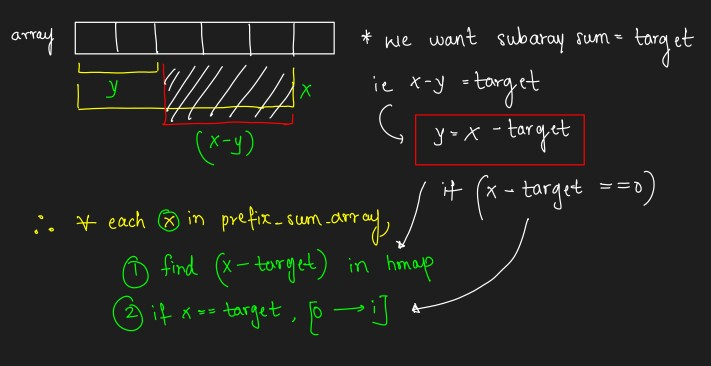

In [25]:
display(Image(filename='src/max_len_subarray_sum.jpg'))

In [26]:
def longest_subarray_target(arr, target):
    n = len(arr)
    cSum = maxLen = 0
    hmap = {}
    resIndex = [0,0]

    for i, x in enumerate(arr):
        cSum += x
        findHmap = cSum-target
        if cSum == target: # [0 ... i] = target
            newLen = i+1
            if newLen > maxLen:
                maxLen = newLen
                resIndex[0], resIndex[1] = 0, i
        elif findHmap in hmap: # Target found
            newLen = i-hmap[findHmap]
            if newLen > maxLen:
                maxLen = newLen
                resIndex[0], resIndex[1] = hmap[findHmap]+1, i
        elif cSum not in hmap:  # why dont always add? [We need left most index -> longest subarray, so if a sum is already there dont add newwer one]
            hmap[cSum] = i
            
    return (maxLen, resIndex)



In [27]:
arr = [5,6,-5,5,3,5,3,-2,0]
print(longest_subarray_target(arr, 8))

arr = [5,5,-5,-5,2]
print(longest_subarray_target(arr, 2))

(4, [2, 5])
(5, [0, 4])


##### Count all subarrays with given target

In [28]:
def count_subarray_sum_target(arr, target):
    hmap = {0:1} # consider initial csum as 0
    count = 0
    csum = 0
    
    for x in arr:
        csum += x
        
        if csum-target in hmap:
            count += hmap[csum-target]
        
        # If you have already seen this cur_sum ,that means
        # there are 2 ways to form sum in case any result uses cur_sum
        hmap[csum] = hmap.get(csum,0)+1
        
        # in longest_subarray_target we dont include csum if already seen. Why?
        # because we need longest, n earliest seen csum, longer the answer subarray
        
    return count
            

In [29]:
arr, target = [1,-1,0], 0
print(count_subarray_sum_target(arr, target))

arr, target = [1,2,1,2,1], 3
print(count_subarray_sum_target(arr, target))

arr, target = [1,2,3], 3
print(count_subarray_sum_target(arr, target))

3
4
2


##### Subarray sum equals Zero

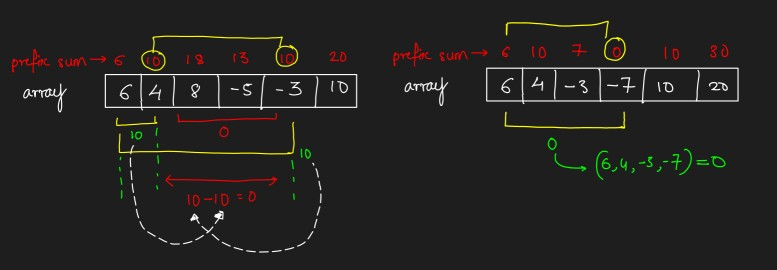

In [30]:
display(Image(filename='src/subarray_sum_0.jpg'))

Solution
1. Calculate Prefix sum
2. While calculating prefix sum array, 
    - if `cur_sum` was previously seen
        - THEN, arr[`last_seen_sum_index`+1 : `cur_sum_index`] = 0  
    - if `cur_sum` = 0,
        - then, arr[0 : `cur_sum_index`] = 0


In [31]:
def check_zero_sum(arr):
    '''
    Return [start_index, end_index] which has subarray sum = 0
    '''
    n = len(arr)
    curSum = 0
    hist = {}

    curSum = 0
    for i,x in enumerate(arr):
        curSum += x
        if x in hist:
            return (hist[x]+1,i)
        elif curSum == 0:
            return (0,i)
        else:
            hist[curSum] = i
    return None


In [32]:
arr = [10, 20, -30, 1, 6]
check_zero_sum(arr)

(0, 2)

##### Equilibrium Point

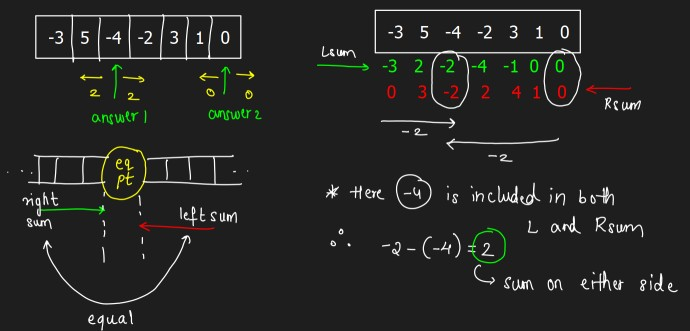

In [33]:
display(Image(filename='src/Equilibrium_Point.jpg'))

In [34]:

def equilibrium(arr):
    '''
    Return equilibrium point
    '''
    n = len(arr)
    lSum = [0]*n

    cSum = 0
    for i in range(n):  # L->R Sum
        cSum += arr[i]
        lSum[i] = cSum

    cSum = 0
    for i in reversed(range(n)):  # L<-R Sum
        cSum += arr[i]
        if cSum == lSum[i]:
            return i
    return None
    
    
arr = [-3,5,-4,-2,3,1]
equilibrium(arr)

2

In [35]:
arr = [-3,5,-4,-2,3,1]
equilibrium(arr)

2

#### Maximum Occuring number in given ranges

https://practice.geeksforgeeks.org/problems/maximum-occured-integer4602/

Solution works only when we know max_range else calculate frequencies using hashmap and do it


In [36]:
def maxOccured(L,R,N,maxx):
        arr = [0 for _ in range(maxx+2)]
        
        for i in range(N):
            arr[L[i]] += 1
            arr[R[i]+1] -= 1
        
        # calculate prefix sums
        csum = arr[0]
        for i in range(1,len(arr)):
            arr[i] += arr[i-1]

        res, max_count = 0, arr[0]
        for i in range(1,len(arr)):
            if arr[i] > max_count:
                res = i
                max_count = arr[i]

        return res

In [37]:
L = [1,4,3,1]
R = [15,8,5,4]
maxOccured(L, R, 4, 15)

4

## Matrix Problems

#### Spiral Matrix

In [38]:
def spiral(arr):
    nr = len(arr) - 1
    nc = len(arr[0]) - 1

    rStart, rEnd = 0, nr
    cStart, cEnd = 0, nc

    res = []
    
    while rStart<=rEnd and cStart<=cEnd:
        for i in range(cStart, cEnd+1):
            res.append(arr[rStart][i])
        rStart += 1
        
        for i in range(rStart, rEnd+1):
            res.append(arr[i][cEnd])
        cEnd -= 1
        
        if rStart <= rEnd:
            for i in reversed(range(cStart, cEnd+1)):
                res.append(arr[rEnd][i])
            rEnd -= 1
        
        if cStart <= cEnd:
            for i in reversed(range(rStart, rEnd+1)):
                res.append(arr[i][cStart])
            
            cStart += 1
    return res

            


In [39]:
arr = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

arr1 = [
    [1, 2, 3,14],
    [4, 5, 6, 34],
    [7, 8, 9, 34]
]


print(spiral(arr))
print(spiral(arr1))

[1, 2, 3, 6, 9, 8, 7, 4, 5]
[1, 2, 3, 14, 34, 34, 9, 8, 7, 4, 5, 6]


#### Spiral Matrix II

Given `n` -> fill a `nxn` matrix spirally from 1 to n*n

In [40]:

def generate_spiral_matrix(n):
    fill_ele = 1
    arr = [[0 for _ in range(n)] for _ in range(n)]
    
    nr = len(arr) - 1
    nc = len(arr[0]) - 1

    rStart, rEnd = 0, nr
    cStart, cEnd = 0, nc

    res = []

    while rStart<=rEnd and cStart<=cEnd:
        for i in range(cStart, cEnd+1):
            arr[rStart][i] = fill_ele
            fill_ele += 1
        rStart += 1

        for i in range(rStart, rEnd+1):
            arr[i][cEnd] = fill_ele
            fill_ele += 1
        cEnd -= 1

        if rStart <= rEnd:
            for i in reversed(range(cStart, cEnd+1)):
                arr[rEnd][i] = fill_ele
                fill_ele += 1
            rEnd -= 1

        if cStart <= cEnd:
            for i in reversed(range(rStart, rEnd+1)):
                arr[i][cStart] = fill_ele
                fill_ele += 1

            cStart += 1
    return arr

    

In [41]:
res = generate_spiral_matrix(n=4)
print(*res, sep="\n")

[1, 2, 3, 4]
[12, 13, 14, 5]
[11, 16, 15, 6]
[10, 9, 8, 7]


## Dynamic Programming


https://leetcode.com/discuss/general-discussion/458695/dynamic-programming-patterns

#### Tower of Hanoi

In [42]:
def toh(n, fromm, to, aux):
    if n==0:
        return
    
    toh(n-1,fromm,aux,to)
    print(f"move disk {n} from rod {fromm} to {to}")
    toh(n-1,aux,to,fromm)

In [43]:
toh(3,'A','C','B')

move disk 1 from rod A to C
move disk 2 from rod A to B
move disk 1 from rod C to B
move disk 3 from rod A to C
move disk 1 from rod B to A
move disk 2 from rod B to C
move disk 1 from rod A to C


#### Subset Sum Problem ( arr[i] > 0)

**Why dont use 0-based indexing instead of `n-1`?** <br>
-> In case the index or sum go negative i.e <0 in Recursive solution you can easily return 0 <br>
But in tabulation for it will give `negative index error`, hence you need to add additional checks to check if index is less than zero causing extra overload

Given an array check if subset sum = target (Subset doesnt need to be in order) <br>
-> Also count how many ways it can be done <br>
-> Assumption : ONLY POSITIVE ELEMENTS

In [133]:
def subset_sum(arr, n, target): # start n-1 : last index (dont have to store len explicitly)
    if target == 0:
        return 1    
    if n==0: # exhausted all elements till now
        return 0

 
    if arr[n-1] > target:
        return subset_sum(arr, n-1, target)

    return subset_sum(arr, n-1, target) + subset_sum(arr, n-1, target -arr[n-1])

def dp_subset_sum(arr, target):
    n = len(arr)

    dp = [[0 for x in range(target+1)] for x in range(n+1)]

    for i in range(n+1): # number of elements left
        for j in range(target+1): # target sum left
            if j==0:
                dp[i][j] = 1
            elif i==0:
                dp[i][j] = 0
            elif arr[i-1] > j:
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = dp[i-1][j] + dp[i-1][j-arr[i-1]]

    # printList(dp)
    return dp[n][target] 
            
            
    

In [135]:
arr = [3, 34, 4, 12, 5, 2] # ANS=2
target = 9

print(subset_sum(arr, len(arr), target))
print(dp_subset_sum(arr, target))

2
2


#### Subset Sum -> Count using 0-based indexing

In [96]:
def findWays(arr, target):
    n = len(arr)
    dp = [[0 for _ in range(target+1)] for _ in range(n)]

    for i in range(n):
        for j in range(target+1):
            if j == 0:
                dp[i][j] = 1
            elif i == 0:
                dp[i][j] = (1 if arr[0] == j else 0)
            elif arr[i] > j:
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = dp[i-1][j] + dp[i-1][j-arr[i]]

    return dp[n-1][target]


In [97]:
arr = [3, 34, 4, 12, 5, 2] # ANS=2
target = 9
print(findWays(arr, target))

2


#### Subset Sum Problem ( arr[i] >= 0)

arr = [0,0,1], target=1 <br>
answer_from_previous = 1 -> [1]<br>
Correct Answer = 3 -> [0,0,1], [0,1], [1] <br><br>
**Why?** When you `see cur_sum`/`j` == 0, you return/count 1<br>
But even after cur_sum=0, there can still be zeros on left. <br><br>
**Solution** : Even if u see j==0, you need to check left side of the array

In [103]:
def count_subset_plus(arr, target):
    n = len(arr)
    dp = [[0 for _ in range(target+1)] for _ in range(n)]

    for i in range(n):
        for j in range(target+1):
            if i == 0:
                if arr[i] == 0 and j==0:
                    dp[i][j] = 2
                elif arr[i] == j or j==0:
                    dp[i][j] = 1
                else:
                    dp[i][j] = 0
            elif arr[i] > j:
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = dp[i-1][j] + dp[i-1][j-arr[i]]

    printList(dp)
    return dp[n-1][target]


In [107]:
arr = [0,0,1]

print(count_subset_plus(arr,1))

DP ARRAY
[2, 0]
[4, 0]
[4, 4]
4


#### Subset Sum - True/False only

In [37]:
def subset_sum_tf(n, k, arr, return_dp=False):
    dp = [[False for _ in range(k+1)] for _ in range(n)]

    for i in range(n):
        for j in range(k+1):
            if j == 0:
                dp[i][j] = True
            elif i == 0:
                dp[i][j] = (arr[i] == j)
            else:
                if arr[i] > j:
                    dp[i][j] = dp[i-1][j]
                else:
                    dp[i][j] = dp[i-1][j] or dp[i-1][j-arr[i]]
	
    if return_dp:
        return dp

    return dp[n-1][k]


#### Partition array into 2 Subsets such that absolute difference is minimal

https://www.codingninjas.com/codestudio/problems/partition-a-set-into-two-subsets-such-that-the-difference-of-subset-sums-is-minimum_842494

`NOTE` : Only Non-Zero integers [Else it will not solvable using DP]

**General Idea** <br>
- S1, S2 => S1, (Sum-S1) <br>
- When we create DP Table (n+1 x target+1), we take last cell as output `n-1, target+1` <br>
- **Interpretation of Last row in DP:** Can you find a subset using `n` elements and give `target` as sum? True|False <br><br>

**In this case**
1. Iterate the last row.
2. Wherever you get True (you can form subset which gives this target) -> Calculate |S1 - (sum-s1)| and give the minimum sum as answer

In [67]:
def minSubsetSumDifference(arr, n):
    totalSum = sum(arr)
    minAbsSum = float('inf')

    dp = subset_sum_tf(n, totalSum, arr, True)

    for i in range(0, totalSum+1):
        s1 = dp[-1][i] # True|False -> Can you make or not
        if s1:
            curDiff = abs(i-(totalSum-i))
            minAbsSum = min(minAbsSum, curDiff)

    return 0 if minAbsSum == float('inf') else minAbsSum


In [70]:
arr = [1,2,3,4]
print(arr, minSubsetSumDifference(arr, len(arr)))

arr = [int(x) for x in "10 20 30 70".split(" ")]
print(arr, minSubsetSumDifference(arr, len(arr)))

arr = [int(x) for x in "0 0 0 0".split(" ")]
print(arr, minSubsetSumDifference(arr, len(arr)))

arr = [int(x) for x in "10 21".split(" ")]
print(arr, minSubsetSumDifference(arr, len(arr)))


[1, 2, 3, 4] 0
[10, 20, 30, 70] 10
[0, 0, 0, 0] 0
[10, 21] 11


#### Partition into 2 subsets with given difference

- All elements must belong one of the 2 partitioned subsets
- Print true or false (done or cant be done)
- arr = [1, 1, 2, 3], diff = [1] <br>
    True [1,1,3] and [2,3]

In [44]:
def get_partition_sums(arr, diff):
    csum = sum(arr)
    s1 = (csum+diff)/2

    return s1, abs(csum-s1)

def check_if_int(n):
    return int(n) == n


In [51]:
def can_partition_with_diff(arr, diff):
    s1, s2 = get_partition_sums(arr, diff)
    print(s1, s2)

    if not check_if_int(s1):
        return False

    n = len(arr)
    countSubsets = dp_subset_sum(arr, int(s1))
    
    return True if countSubsets>0 else False

In [54]:
arr = [1,1,2,3]
diff = 1

can_partition_with_diff(arr, diff)


4.0 3.0


True

#### Knapsack - Bounded (0-1 Knapsack)

Given Weights and costs of items, and max_capacity of bag <br>
Task : You can either pick/not pick an item <br>
<br>
Give the items you will pick which give max/min cost and also fit in the max_capacity

In [114]:
def bounded_knapsack(arr, weights, W, n ):
    if n==0 or W==0:
        return 0

    if weights[n-1] > W: #dont pick
        return bounded_knapsack(arr, weights, W, n-1)

    return max(
        arr[n-1] + bounded_knapsack(arr, weights, W-weights[n-1], n-1),
        bounded_knapsack(arr, weights, W, n-1)
    )
    


In [127]:
def dp_bounded_knapsack(arr, weights, W):
    n = len(arr)
    dp = [[0 for _ in range(W+1)] for _ in range(n+1)]

    for i in range(n+1): # current element  index
        for j in range(W+1): # cur max_capacity remaining
            if j==0 or i==0:
                dp[i][j] = 0
            elif weights[i-1] > j: # dont pick current ele
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = max(arr[i-1] + dp[i-1][j-weights[i-1]], dp[i-1][j-1])
    
    # printList(dp)
    return dp[n][W]

In [142]:
def dp_bounded_knapsack_zero_index(arr, weights, W):
    n = len(arr)
    dp = [[0 for _ in range(W+1)] for _ in range(n)]

    for i in range(n): # current element  index
        for j in range(W+1): # cur_capacity remaining
            if j==0: # capacity=0
                dp[i][j] = 0
            elif i==0: #last item
                if weights[0] > j: # last item has W<cur_capacity
                    dp[i][j] = 0
                else:
                    dp[i][j] = arr[0] # last item can be picked -> so profit is arr[0] (you cant pick anything else as this is the first element)
            elif weights[i] > j:
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = max(arr[i]+dp[i-1][j-weights[i]],dp[i-1][j])
            
            
    
    return dp[n-1][W]

In [143]:
weights = [10, 20, 30]
costs = [60, 100, 120]
capacity = 50 
# RESULT = 220 pick 20+30 = 50, total = 100+120

# print(bounded_knapsack(costs, weights, capacity, len(costs)))
print(dp_bounded_knapsack(costs, weights, capacity))
print(dp_bounded_knapsack_zero_index(costs, weights, capacity))


220
220


#### Target Sum 

You want to build an expression out of nums by adding one of the symbols '+' and '-' before each integer in nums and then concatenate all the integers.

For example, if nums = [2, 1], you can add a '+' before 2 and a '-' before 1 and concatenate them to build the expression "+2-1".

**Task** : Return the number of different expressions that you can build, which evaluates to target <br>
**Solution** : https://leetcode.com/problems/target-sum/discuss/455024/DP-IS-EASY!-5-Steps-to-Think-Through-DP-Questions.

In [8]:
class Solution:
    dp = {}

    def target_sum(self, arr, n, cur_sum):
        if (n,cur_sum) in self.dp:
            return self.dp[(n,cur_sum)]

        if n==0:
            return 1 if cur_sum==0 else 0
        cur_ele = arr[n-1]
        res = self.target_sum(arr, n-1, cur_sum-cur_ele) + self.target_sum(arr,n-1, cur_sum+cur_ele)

        self.dp[(n,cur_sum)] = res
        return res
    


In [9]:
nums = [1,1,1,1,1]
target = 3
# result = 5 (5 ways to assign +/- to nums to get answer as 3)
 
print(Solution().target_sum(nums, len(nums), target))

nums = [0,0,0,0,0,0,0,0,1]
target = 1

print(Solution().target_sum(nums, len(nums), target))


5
192


#### Longest Common Subsequence

**Variations**
1. Longest Palindromic Subsequence -> LCS(str, reverse(str)
2. Min num of insertions or deletion to make string s1=s2
    - l = LCS(s1,s2)
    - Min Deletions -> len(s1)-l
    - Min Insertions -> len(s2)-l
3. Shortest Common Subsequence
    - Given 2 strings, create another string such that it has both the srting as subsequence and is as short as possible
    - LCS = LCS(str1,str2)
    - res = LCS + Add missing chars from str1 and str2 in res in order (Such that str1/2 subseq can be formed from res)

In [21]:
def longest_common_seq(s1, s2, m, n):
    if m==0 or n==0:
        return 0
    if s1[m-1] == s2[n-1]:
        return 1+longest_common_seq(s1,s2,m-1,n-1)
    else:
        return max(longest_common_seq(s1,s2,m-1,n),longest_common_seq(s1,s2,m,n-1))

In [34]:
def lcs_dp(s1,s2, return_dp=False):
    m = len(s1)
    n = len(s2)
    dp = [[0 for _ in range(n+1)] for _ in range(m+1)]

    for i in range(m+1):
        for j in range(n+1):
            if i==0 or j==0:
                dp[i][j] = 0
            elif s1[i-1] == s2[j-1]:
                dp[i][j] = 1+dp[i-1][j-1]
            else:
                dp[i][j] = max(dp[i-1][j],dp[i][j-1])
    printList(dp)
    if return_dp:
        return dp
    return dp[m-1][n-1]
                
            

In [35]:
s1, s2 = "abcde", "abc" #3
print(longest_common_seq(s1,s2,len(s1), len(s2)))
print(lcs_dp(s1,s2),"\n")

s1, s2 = "abcdgh", "aedfhr" #3
print(longest_common_seq(s1,s2,len(s1)-1, len(s2)-1))
print(lcs_dp(s1,s2),"\n")

s1, s2 = "bl", "yby" #3
print(longest_common_seq(s1,s2,len(s1)-1, len(s2)-1))
print(lcs_dp(s1,s2),"\n")

3
DP ARRAY
[0, 0, 0, 0]
[0, 1, 1, 1]
[0, 1, 2, 2]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
2 

2
DP ARRAY
[0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 2, 2, 2, 2]
[0, 1, 1, 2, 2, 2, 2]
[0, 1, 1, 2, 2, 3, 3]
2 

1
DP ARRAY
[0, 0, 0, 0]
[0, 0, 1, 1]
[0, 0, 1, 1]
1 



#### Printing LCS

In [65]:
def print_lcs(s1,s2, dp):
    m = len(s1)
    n = len(s2)
    
    res = ""
    
    i,j = m, n
    while i!=0 and j!=0:
        # print(i,j,s1[i-1],s2[j-1])
        # same char -> move diagonally up
        if s1[i-1] == s2[j-1]:
            res = s1[i-1] + res
            i -= 1
            j -= 1
        else:
            # top > right
            if dp[i-1][j] > dp[i][j-1]:
                i -= 1
            else:
                j -= 1
    
    return res
                
                

In [70]:
s1, s2 = "abcde", "abc" #3
dp = lcs_dp(s1,s2,True)
print(print_lcs(s1,s2,dp),"\n")

s1, s2 = "abcdgh", "aedfhr" #3
dp = lcs_dp(s1,s2,True)
print(print_lcs(s1,s2,dp))


DP ARRAY
[0, 0, 0, 0]
[0, 1, 1, 1]
[0, 1, 2, 2]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
abc 

DP ARRAY
[0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 2, 2, 2, 2]
[0, 1, 1, 2, 2, 2, 2]
[0, 1, 1, 2, 2, 3, 3]
adh


#### Climbing Stairs

You can climb 1 or steps at time. <br>
Given there are `n` stairs, in how many ways can you reach `nth` stair starting from base

In [2]:
def climbStairs(n):
    if n<2:
            return 1
            
    dp = [0 for _ in range(n+1)]
    dp[0] = 1
    dp[1] = 1

    for i in range(2,n+1):
        dp[i] = dp[i-1]+dp[i-2]
    return dp[i]

In [5]:
climbStairs(3) 

3

#### Minimum Steps to reach end

##### O(N*2) Solution

In [73]:
# DP[i] = min steps to reach i from start -> res = dp[n-1]
def min_steps(arr):
    n = len(arr)
    dp = [float('inf') for _ in range(n)]
    dp[0] = 0
        
    for i in range(1,n):
        for j in range(i):
            step = j+arr[j]
            if step >= i:
                if dp[j]!=float('inf'): # check if there is way to reach that previous position
                    dp[i] = min(dp[i],1+dp[j])
    print(dp)
    return dp[n-1]
            

##### Better than O(N*2)

In [ ]:
def jump(self, arr: List[int]) -> int:
    n = len(arr)
    dp = [float('inf') for _ in range(n)]

    dp[n-1] = 0
    for i in reversed(range(n-1)):
        if arr[i] == 0:
            dp[i] = float('inf')
            continue
        max_jump = i+arr[i] #max index you can reach from index i
        if max_jump >= n-1: # you can directly jump to last one
            dp[i] = 1
        else:
            dp[i] = float('inf')
            for j in range(i+1,max_jump+1):
                dp[i] = min(dp[i], 1+dp[j])

    return dp[0]


In [74]:
arr = [3,4,2,1,2,1] #2
print(min_steps(arr))

arr = [4,1,5,3,1,3,2,1,8] #3
print(min_steps(arr))

[0, 1, 1, 1, 2, 2]
2
[0, 1, 1, 1, 1, 2, 2, 2, 3]
3


##### Can you reach last step or Not? Return True|False
O(N) solution<br>
https://leetcode.com/problems/jump-game/discuss/452807/Python-DP-O(n)-with-explanation

In [6]:
def canJump(self, arr) :
    n = len(arr)
    if n==1:
        return True
    max_reach_index  = 0 + arr[0] #store max reachable index

    for i in range(1,n):
         # if you cant reach this index then you cant move forward 
        if max_reach_index < i: #max_res<i means from all indices<i, you can never cross i (Remember you are saving MAX_REACH)
            return False

        max_reach_index = max(max_reach_index, i+arr[i])

        if max_reach_index >= n-1:
            return True

    return False

#### Maximum Rod Cuts

Given a rod of length `n`, you can it in pieces of size `a`,`b` or `c`. Find max ways in ways you cut the rod into pieces.

In [36]:
def max_rod_cut(n, a, b, c):
    if n<0:
        return -1 # not possible
    if n==0:
        return 0
    res = max([max_rod_cut(n-a,a,b,c),
                    max_rod_cut(n-b,a,b,c),
                    max_rod_cut(n-c,a,b,c)])
    if res == -1: #not possible
        return -1
    else:
        return 1+res

In [52]:
def max_rod_cut_dp(n,a,b,c):
    dp = [0 for _ in range(n+1)]
    
    dp[0] = 0
    for i in range(1,n+1):
        dp[i] = -1
        for x in [a,b,c]:
            if i-x >= 0:
                dp[i] = max(dp[i],dp[i-x])
        if dp[i] != -1:
            dp[i] += 1
            
    return dp[n]
        

In [53]:
n = 23
a,b,c = 11,12,13
print(max_rod_cut(n,a,b,c))
print(max_rod_cut_dp(n,a,b,c),"\n")

n = 5
a,b,c = 1,2,3

print(max_rod_cut(n,a,b,c))
print(max_rod_cut_dp(n,a,b,c))

2
2 

5
5


#### Frog Jump - Easy

https://www.codingninjas.com/codestudio/problems/frog-jump_3621012?source=youtube&campaign=striver_dp_videos&utm_source=youtube&utm_medium=affiliate&utm_campaign=striver_dp_videos

In [6]:
def frogJump(n: int, arr):
    dp = [0 for _ in range(n+1)]
    dp[0] = 0
    dp[1] = abs(arr[1]-arr[0])
    for i in range(2,n):
        dp[i] = min(dp[i-1]+abs(arr[i]-arr[i-1]), dp[i-2]+abs(arr[i]-arr[i-2]))     
    return dp[n-1]


In [8]:
frogJump(4, [10,20,30,10])

20

#### Maximum Sum of non adjancent elements | House Robber-I

https://www.codingninjas.com/codestudio/problems/maximum-sum-of-non-adjacent-elements_843261 <br>
https://leetcode.com/problems/house-robber/ <br>

You are given an array/list of ‘N’ integers. You are supposed to return the maximum sum of the subsequence 
with the constraint that no two elements are adjacent in the given array/list

In [136]:
def maximumNonAdjacentSum(arr, n):    
    if n<0:
        return 0
    
    if n==0:
        return arr[0]
    
    return max(
        arr[n-1] + maximumNonAdjacentSum(arr,n-2),
        maximumNonAdjacentSum(arr, n-1)
    )

In [171]:
def dp_maximumNonAdjacentSum(arr,n=None):
    n = len(arr)
    if n == 1:
        return arr[0]
    dp = [0 for _ in range(n)]

    # at 0 u can only pick a[0]
    # at 1 you 2 options -> pick a[1] or a[0] as if cant pick both
    dp[0] = arr[0]
    dp[1] = max(arr[1], arr[0]) # this is not needed in recursive -> f(-ve index) will return as 0, in case of tabular index cant be negative

    for i in range(2,n):
        dp[i] = max(dp[i-1], arr[i]+dp[i-2])
        
    return dp[n-1]


In [172]:
arr = [1,2,3,5,4] # res=9
print(dp_maximumNonAdjacentSum(arr, len(arr)))

arr = [1,2,3,1,3,5,8,1,9]
print(dp_maximumNonAdjacentSum(arr, len(arr)))

arr = [8,8]
print(dp_maximumNonAdjacentSum(arr))
maximumNonAdjacentSum(arr, len(arr)-1)

8
24
8


8

#### House Robber II


https://leetcode.com/problems/house-robber-ii/ <br>
Maximize sum by picking Non-adjacent elements but first and last element are considered to be adjacent <br>
Added Logic : You cant consider arr[0] and arr[-1] <br><br>
**Solution**<br><br>
U cant pick first and last, so in our solution we are sure that both cant be considered <br>
**max(** maximumNonAdjacentSum(arr[first:]), maximumNonAdjacentSum(arr[:last]) **)**

In [176]:
def houses_2(arr):
    n = len(arr)
    return max(
        dp_maximumNonAdjacentSum(arr[1:]),
        dp_maximumNonAdjacentSum(arr[:-1])
    )

In [177]:
nums = [1,2,3,1]
print(houses_2(nums))

nums = [2,3,2]
print(houses_2(nums))


4
3


#### Ninja Training <br>

https://www.codingninjas.com/codestudio/problems/ninja-s-training_3621003 <br>

Given `n` days and `k` types of activities you can do each day to earn points. <br>
Give max points you can earn at end of `n` days, but you cant do same acticity consecutively

In [220]:
def ninja_training(arr):
    n = len(arr)
    n_sports = len(arr[0])

    dp = [[0 for _ in range(n_sports)] for _ in range(n)]

    for i in range(n):
        for j in range(n_sports):
            if i==0:
                dp[i][j] = arr[i][j]
            else:
                for k in range(n_sports): # if j=0, then take previous 1 and 2 (n_sports=3)
                    if k == j:
                        continue
                    dp[i][j] = max(dp[i][j], arr[i][j]+dp[i-1][k] )
    
    return max(dp[n-1])


## FOR n_sports=3 ##
#
# if i==0:
#     dp[i][j] = arr[i][j]
# elif j==0:
#     dp[i][j] = arr[i][j] + max(dp[i-1][1], dp[i-1][2])
# elif j==1:
#     dp[i][j] = arr[i][j] + max(dp[i-1][0], dp[i-1][2])
# else:
#     dp[i][j] = arr[i][j] + max(dp[i-1][0], dp[i-1][1]
#

In [221]:
arr = [
    [1,2,5],
    [3,1,1],
    [3,3,3]
]
# EXPECTED RES = 11
print(ninja_training(arr))

arr = [
    [10,40,70],
    [20,50,80],
    [30,60,90]
]
# EXPECTED RES = 210
print(ninja_training(arr))

arr = [[18,11,19],[4,13,7],[1,8,13]]
print(ninja_training(arr)) # 45

arr = [[10,50,1],[5,100,11]]
print(ninja_training(arr)) # 110

11
210
45
110


#### Unique Paths

In [6]:
def uniquePaths( m: int, n: int) -> int:
    grid = [[0 for _ in range(n)] for _ in range(m)]
    
    for i in range(m):
        for j in range(n):
            if i==0 and j==0:
                grid[i][j] = 1
            elif i==0 or j==0: # you are on top row or left most row(you can reach 0,0 in only 1 way i.e move all left/up)
                grid[i][j] = 1
            else:
                grid[i][j] = grid[i-1][j] + grid[i][j-1]
    print(*grid, sep="\n")
    return grid[m-1][n-1]
            
    

In [7]:
uniquePaths(3,7) # RES=28

[1, 1, 1, 1, 1, 1, 1]
[1, 2, 3, 4, 5, 6, 7]
[1, 3, 6, 10, 15, 21, 28]


28

#### Unique Paths II (With Obstacles)

In [13]:

def uniquePathsWithObstacles(obstacleGrid):
    m = len(obstacleGrid)
    n = len(obstacleGrid[0])
    grid = [[0 for _ in range(n)] for _ in range(m)]

        
    if obstacleGrid[0][0]==1 or obstacleGrid[m-1][n-1]==1:
        return 0
    
    for i in range(m):
        for j in range(n):
            if obstacleGrid[i][j] == 1:
                grid[i][j] = 0
            elif i==0 and j==0:
                grid[i][j] = 1
            # elif i==0 or j==0: You cant say you can move all lefts/ups as there may be obstacles in between
            #     grid[i][j] = 1
            else:
                grid[i][j] = grid[i-1][j] + grid[i][j-1]
    return grid[m-1][n-1]


In [17]:
print(uniquePathsWithObstacles([[0,0,0],[0,1,0],[0,0,0]])) # RES = 2

print(uniquePathsWithObstacles([[0,0],[1,1],[0,0]])) # RES=0

2
0


#### Minimum Path Sum

In [18]:

def minPathSum(grid) -> int:
    nr = len(grid)
    nc = len(grid[0])
    
    dp = [[0 for _ in range(nc)] for _ in range(nr)]
    
    for i in range(nr):
        for j in range(nc):
            if i==0 and j==0:
                dp[i][j] = grid[i][j]
            elif j==0: # upward movement is possible
                dp[i][j] = grid[i][j] + dp[i-1][j]
            elif i==0: # only left movement is possible
                dp[i][j] = grid[i][j] + dp[i][j-1]
            else: # both up and left are possible
                dp[i][j] = grid[i][j] + min(dp[i-1][j], dp[i][j-1])
    print(*dp, sep="\n")
    
    return dp[nr-1][nc-1]

In [19]:
arr = [[1,3,1],[1,5,1],[4,2,1]] # res = 7
minPathSum(arr)

[1, 4, 5]
[2, 7, 6]
[6, 8, 7]


7

#### Triangle Min Sum path (Fixed Start, Variable End)

In [26]:
def traingle_minimum_total(triangle) -> int:
    n = len(triangle)
    
    dp = [[0 for _ in range(x+1)] for x in range(n)]
    dp[0][0] = triangle[0][0]
    
    for i in range(1,n):
        prev_row_len = len(dp[i-1])
        for j in range(len(dp[i])):
            prev_res1 = float('inf')
            prev_res2 = float('inf')
            if j >= 0 and j < prev_row_len:
                prev_res1 = dp[i-1][j]
            if j-1 >= 0 and j-1 < prev_row_len:
                prev_res2 = dp[i-1][j-1]
            dp[i][j] = triangle[i][j] + min(prev_res1, prev_res2)
    
    print(*dp, sep="\n")
    return min(dp[-1])
            
            

In [27]:
arr = [[2],[3,4],[6,5,7],[4,1,8,3]] # Res = 11

traingle_minimum_total(arr)

[2]
[5, 6]
[11, 10, 13]
[15, 11, 18, 16]


11

#### Min Falling Path Sum (Variable start,end)


In [30]:
def minFallingPathSum( matrix) -> int:
    n = len(matrix)
    dp = [[0 for _ in range(n)] for _ in range(n)]
    dp[0] = matrix[0]
    
    for i in range(1,n):
        for j in range(n):
            # up direction is gauranteed, but diagonal up-left/right may overflow
            diag1 = float('inf')
            diag2 = float('inf')
            
            if (j-1) >= 0 and (j-1) < n:
                diag1 = dp[i-1][j-1]
            if (j+1) >= 0 and (j+1) < n:
                diag2 = dp[i-1][j+1]
            
            dp[i][j] = matrix[i][j] + min([dp[i-1][j], diag1, diag2])
            
    return min(dp[-1])
    

In [31]:
print(minFallingPathSum([[2,1,3],[6,5,4],[7,8,9]])) # res=13

print(minFallingPathSum([[-48]])) # res = -48

13
-48


In [300]:
def subsetSumToK(n, k, arr):
    dp = [[False for _ in range(k+1)] for _ in range(n)]

    for i in range(n):
        for j in range(k+1):
            if j == 0:
                dp[i][j] = True
            elif i == 0:
                dp[i][j] = (arr[i] == j)
            else:
                if arr[i] > j:
                    dp[i][j] = dp[i-1][j]
                else:
                    dp[i][j] = dp[i-1][j] or dp[i-1][j-arr[i]]

    # printList(dp)
    return dp[n-1][k]


In [301]:
arr = [4,3,2,1]
subsetSumToK(len(arr),5,arr)

True

#### Dice Rolls with Target sum

https://leetcode.com/problems/number-of-dice-rolls-with-target-sum/ <br>

You have n dice and each die has k faces numbered from 1 to k.
Given three integers n, k, and target, return the number of possible ways (out of the kn total ways) to roll the dice so the sum of the face-up numbers equals target

In [270]:
def dice_rolls(n, k, target):
    # print(n,target)
    idx = (n,target)
    if n==1: # you have only 1 roll n can get [1..k]
        return 1 if target <= k else 0

    roll_count = 0
    for i in range(1,k+1):
        rem_target = target-i
        if rem_target > 0: # tar<0:Cant Pick | tar==0: you reached without all throws (Not correct as you need to use all throws)
            roll_count += dice_rolls(n-1, k, rem_target)
    return roll_count


In [284]:
class Solution:
    dp = {}
    
    def __init__(self):
        self.dp = {}

    def dice_rolls(self, n, k, target):
        idx = (n,target)
        if idx in self.dp:
            return self.dp[idx]

        if n==1: # you have only 1 roll n can get [1..k]
            res =  1 if target <= k else 0
            self.dp[idx] = res
            return res

        roll_count = 0
        for i in range(1,k+1):
            rem_target = target-i
            if rem_target > 0: # tar<0:Cant Pick | tar==0: you reached without all throws (Not correct as you need to use all throws)
                roll_count += self.dice_rolls(n-1, k, rem_target)  % ((10**9)+7)
                
        roll_count = roll_count % ((10**9)+7)
        self.dp[idx] = roll_count
        return roll_count


In [296]:
def dice_roll_tabular(n,k,target):
    dp = [[0 for _ in range(target+1)] for _ in range(n+1)]

    for i in range(1,n+1):
        for j in range(target+1):
            if i==1:
                dp[i][j] = 1 if j <= k else 0
            else:
                r_count = 0
                for x in range(1,k+1):
                    if (j-x) > 0:
                        r_count += (dp[i-1][j-x])% (10**9+7)
                        r_count = r_count % (10**9+7)
                dp[i][j] = r_count 

    return dp[n][target]

In [299]:
print(dice_rolls(2,6,7))
print(Solution().dice_rolls(2,6,7))
print(dice_roll_tabular(2,6,7))

6
6
6


In [298]:
print(dice_rolls(2,5,10))
print(Solution().dice_rolls(2,5,10))
print(dice_roll_tabular(2,5,10))

1
1
1


In [1]:
# TODO

#### Coin Change

https://leetcode.com/problems/coin-change/

Greedy Approach doesnt work here -> Use Unbounded Knapsack

In [30]:
def min_coin_change(coins, amount):
    n = len(coins) 
    dp = [float('inf') for _ in range(amount+1)] # initially we asume we need INF coins to make amount
    dp[0] = 0

    for cur_amount in range(1,amount+1):
        for coin in coins:
            if coin > cur_amount: # make sure coins is sorted | else iterate all elements
                break
            rem_amount = cur_amount - coin
            if dp[rem_amount] != float('inf'):
                dp[cur_amount] = min(dp[cur_amount], 1+dp[rem_amount])
    
    return dp[amount] if dp[amount] != float('inf') else -1


In [31]:
arr = [1,2,5]
target = 11 # res = 3

min_coin_change(arr, target)

3

#### Coin Change - Count possible ways to make change given inf coins

In [18]:
def numberOfWays(coins,n,target):
    dp = [[0 for _ in range(target+1)] for _ in range(n)]
    
    for i in range(0,n):
        for j in range(target+1):
            if j==0:
                dp[i][j] = 1
            elif i==0: # if you can pick only first coin, then 1 if you can get target usning n nos of that coin
                dp[i][j] = 1 if j%coins[0] == 0 else 0
            elif coins[i] > j:
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = dp[i-1][j] + dp[i][j-coins[i]]
                
    print(*dp,sep="\n")
    return dp[n-1][target]

In [19]:
coins = [1,2,3]
target = 4

print(numberOfWays(coins, len(coins), target))

coins = [2,5,3,6]
target = 10
print(numberOfWays(coins, len(coins), target))

[1, 1, 1, 1, 1]
[1, 1, 2, 2, 3]
[1, 1, 2, 3, 4]
4
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2]
[1, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4]
[1, 0, 1, 1, 1, 2, 3, 2, 4, 4, 5]
5


#### Edit Distance

Given two strings `word1` and `word2`, return the minimum number of operations required to convert word1 to word2.
You have the following three operations permitted on a word:
- Insert a character | Delete a character | Replace a character

In [73]:
def edit_distance(s1, s2, m, n):
    if m == 0: # s1 is empty, then ED = len(s2)
        return n
    elif n==0:
        return m
    
    if s1[m-1] == s2[n-1]: # no ops needed as they are sma
        return edit_distance(s1,s2,m-1,n-1)
    else:
        # +1 as in all case you perform 1 operation(insert/delete/replace)
        return 1 + min([
            edit_distance(s1,s2,m,n-1), # insert char in s1 to match s2 ending
            edit_distance(s1,s2,m-1,n), # delete char from s1
            edit_distance(s1,s2,m-1,n-1) # replace last char in s1 with matching one of s2
        ])

In [77]:
def edit_distance_dp(s1,s2):
    m = len(s1)
    n = len(s2)
    
    dp = [[0 for _ in range(n+1)] for _ in range(m+1)]
    
    for i in range(m+1):
        for j in range(n+1):
            if i==0:
                dp[i][j] = j
            elif j==0:
                dp[i][j] = i
            elif s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] =  1 + min([
                    dp[i-1][j], # delete
                    dp[i][j-1], # insert
                    dp[i-1][j-1] # replace
                ])
    return dp[m][n]

In [92]:
def edit_dist_dp_1_index(s1,s2):
    m = len(s1)
    n = len(s2)
    dp = [[0 for _ in range(n)] for _ in range(m)]
    
    for i in range(m):
        for j in range(n):
            if i==0 and j==0: # if only 1 char left in both
                dp[i][j] = 0 if s1[i]==s2[j] else 1
            elif i==0 or j==0: # one has 1 char n other has more than 1
                res = 0 if s1[i]==s2[j] else 1 # if last char are same, then dp = left chars in longer string
                dp[i][j] = res + (max(i,j))
            elif s1[i] == s2[j]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i][j-1],dp[i-1][j],dp[i-1][j-1])
    return dp[m-1][n-1]

In [93]:
word1,word2  = "horse","ros"
print(edit_distance(word1, word2, len(word1), len(word2)))
print(edit_dist_dp_1_index(word1, word2))
print(edit_distance_dp(word1, word2),"\n")

word1,word2  = "intention","execution"
print(edit_distance(word1, word2, len(word1), len(word2)))
print(edit_dist_dp_1_index(word1, word2))
print(edit_distance_dp(word1, word2),"\n")

3
3
3 

5
5
5 



#### Longest Increasing Subsequence

**Variations of LCS**
1. **Minimum no of deletions to make array sorted** <br>
   Min Deletions = len(arr) - LIS(arr)
2. **Maximum Increasing Subsequence Sum**<br>
   - DP[i] -> Max sum of IS ending at `i`
   - Same logic, but in internal for loop instead of max_len pick max_sum
3. **Maximum Length Bitonic Subsequence**<br>
   - Bitonic : Increasing than decreasing (only one peak)
   - Solution: Two dp arrays -> LIS and LDS
       1. LIS[i] - length of longest IS ending at i
       2. LDS[i] - Lenght of lontest Decreasing Subseq starting from i (Populated by reverse traversal L<-R)
   - Max len = max(`LDS[i]`+`LCS[i]`-1) 
   - Why? `lis` gives max increasing subseq till `i,` n `lds` gives max decreasing subseq starting from `i`. Here, `i` is considered as peak

In [2]:
def LIS(arr):
    n = len(arr)
    dp = [0 for _ in range(n)]

    # DP[i] -> maximum length of LIS ending at index i
    dp[0] = 1

    for i in range(1,n):
        ele = arr[i]
        cur_len = 1
        for j in range(i):
            if arr[j] < ele: # you can only take nos before arr[i] (increasing subsequence)
                cur_len = max(cur_len, 1+dp[j])
        dp[i] = cur_len


    return max(dp)

In [3]:
arr = [1,3,6,7,9,4,10,5,6]
print(LIS(arr))


6


#### Longest Palindromic Substring

- https://www.youtube.com/watch?v=UflHuQj6MVA
- https://www.geeksforgeeks.org/longest-palindrome-substring-set-1/
 <br>
1. if len(str) == 1, then its a palindrome <br>
2. if len(str) == 2, & str[start] == str[end] => then its palindrome <br>
3. len(str) > 2, (str[start]==str[end]) && is_palindrome(str[start+1:end-1])  <br>
ababa -> a==a and is_palindrome(bab) <br> <br>
Here, in our DP table -> i=startIndex, j=endIndex
- We first fill dp[i][j] where i==j with 1 [Len == 1]
- Then fill dp[i][j] where (j-i)=1 [Len == 2]
- Fill remaining Lengths

In [44]:
def LPS(str):
    n = len(str)
    dp = [[False for _ in range(n)] for _ in range(n)]
    
    i = 0 # fill str with len == 1
    while i<n:
        dp[i][i] = True
        i +=1

    i=1 # fill str with len==2
    while i<n:
        if str[i-1] == str[i]:
            dp[i-1][i] = True
        i += 1

    k = 3
    for k in range(3,n):
        for startIndex in range(0,n-k+1):
            endIndex = startIndex + k -1
            if str[startIndex] == str[endIndex] and dp[startIndex+1][endIndex-1]:
                dp[startIndex][endIndex] = True


    
    print(*dp,sep="\n")

In [45]:
str = "forgeeksskeegfor"
str = "xwowy"
LPS(str)

[True, False, False, False, False]
[False, True, False, True, False]
[False, False, True, False, False]
[False, False, False, True, False]
[False, False, False, False, True]


#### Longest Increasing Subsequence Sum

Variation : https://leetcode.com/problems/best-team-with-no-conflicts/ <br>
Here, its not strictly increasing -> less than or increasing

In [82]:
def LIS_sum(arr):
    n = len(arr)
    dp = [0 for _ in range(n)]
    dp[0] = arr[0]
    
    for i in range(1,n):
        cur_ele = arr[i]
        for j in range(i):
            if arr[j]<arr[i]:
                dp[i] = max(dp[i],cur_ele+dp[j])
    print(dp)
    return max(dp)

In [83]:
arr = [1, 101, 2, 3, 100, 4, 5] # res = 106
print(LIS_sum(arr))


[1, 102, 3, 6, 106, 10, 15]
106


#### Egg Drop Puzzle

https://leetcode.com/problems/super-egg-drop/discuss/159079/Python-DP-from-kn2-to-knlogn-to-kn <br>
https://www.youtube.com/watch?v=S49zeUjeUL0&list=PL_z_8CaSLPWekqhdCPmFohncHwz8TY2Go&index=42

Brute-Force DP -> Will give TLE

In [33]:
def egg_drop(self, E, F): 
    """_summary_

    Args:
        E : No of eggs
        F : No of floors

    """
    
    dp = [[0 for _ in range(F+1)] for _ in range(E+1)]
    
    for e in range(2,E+1):
        for f in range(2,F+1):
            if e==0:
                dp[e][f] = 0
                continue
            elif e==1:
                dp[e][f] = f
                continue
            elif f<=1:
                dp[e][f] = f
                continue
                
            min_moves = float('inf')
            for cur_f in range(1,f+1): # check all places you can drop first egg from [1..k]
                worst_case = 1 + max( 
                    dp[e-1][cur_f-1], # breaks -> check below part
                    dp[e][f-cur_f] # doesnt break -> check top part above cur_f
                )
                min_moves = min(min_moves, worst_case)
            dp[e][f] = min_moves
    # print(*dp,"\n",sep="\n")
    return dp[E][F]

## Linked List

In [5]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    
    def __str__(self):
        return str(self.val)

def printLL(head):
    while head:
        print(head.val,end="->")
        head = head.next
    print()


#### Middle of linkedlist

In [6]:

def middleNode(head):
    slow = head
    fast = head
    
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    
    return slow
        
        

In [7]:
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

printLL(head)

print(middleNode(head))

1->2->3->4->5->
3


#### Remove Nth node from last

**Logic**
**Solution 1** : find len(LL) -> iterate to N-nth node <br>
**Solution 2** : <br>
INIT slow = head<br>
INIT fast = head -> move fast n times<br>
iterate slow and fast normally (increment by 1)<br>
When fast reaches end -> slow = answer<br><br>

**Logic**
You init `fast` by `n` steps ahead of head, that means `slow` is `n` steps behind `fast` i.e fast-n<br>
Then u increment both. When `fast` reaches end, `slow` will have reached `end-n` since it was lagging by `n` steps when we had started

In [ ]:

def removeNthFromEnd(self, head, n):
    slow = head
    fast = head
    
    
    for _ in range(n):
        fast = fast.next
    
    if not fast: # [1,2,3] n=3 -> fast will be at None, that means slow is already at (N-n)th position
        return head.next
    
    while fast and fast.next:
        slow = slow.next
        fast = fast.next
    
    
    slow.next = slow.next.next
    return head
        

#### Reverse a Linked List

In [1]:

def reverseList(self, head):
    prev = None
    cur = head 
    
    while cur:
        next_node = cur.next
        cur.next = prev
        prev = cur
        cur = next_node
        
    return prev

In [14]:
def reverse_list_recursive(head):
    if not head.next:
        return head
    
    res = reverse_list_recursive(head.next)
    res.next = head
    head.next = None

    return head


#### Remove Duplicates from Sorted Linked List

In [3]:

class Solution:
    def deleteDuplicates(self, head):
        HEAD = head
        node = head
        
        if not node:
            return node
        
        while node and node.next:
            if node.val == node.next.val: # even if you find duplicate it will get next in next iteration
                node.next = node.next.next
            else: # MAIN PART -> 
                node = node.next
        
        return HEAD

### Merge 2 Sorted Linked Lists [Extra Space]

In [17]:
class Solution:
        
    def mergeTwoLists(self, head1, head2):
        resHead = ListNode(0)
        res_root = resHead
        
        while head1 and head2:
            if head1.val <= head2.val:
                resHead.next = ListNode(head1.val)
                head1 = head1.next
            else:
                resHead.next = ListNode(head2.val)
                head2 = head2.next
            
            
            resHead = resHead.next
        
        if head1 and head2: # both lists exhausted
            return res_root.next
        
        if head1: # only one list exhausted another one remains
            resHead.next = head1
        else:
            resHead.next = head2
            
        return res_root.next

### Linked List Cycle


In [18]:
def hasCycle(head):
    slow = head
    fast = head
    
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        
        if slow == fast:
            return True
    return False
    

### Linked List Cycle II - Detect Start of Cycle

**Core Idea -> SlowFast + Index**
1. L -> length of cycle (Find it)
2. X,Y -> Head
3. Move Y `L` times, then move both `Y` and `X` by 1 until they meet
4. They meet at start of Linked List

**Why?** <br>
Lets say length of cycle is `k`, then initially `Y` is `k` times ahead of `X`<br>
So always while iterating `Y` is `k` times ahead of `X`<br>
**When they meet?** <br>
They can only meet at start of cycle -> Only in this case `Y` is `k` ahead of `Y` and they meet since it traverses loop and returns back<br><br>

**How to find len(cycle)?** <br>
Slow-Fast approah until they meet
Keep `slow` constant n move `Fast` by 1 until it meets `slow` again = length of cycle*

In [19]:
class Solution:
    def get_cycle_length(self, head):
        slow = head
        fast = head
        cycle_len = 1
        
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            
            if slow == fast: # loop found
                fast = fast.next
                while slow != fast:
                    fast = fast.next
                    cycle_len += 1
                    
                return cycle_len
            
        return cycle_len
                
    def detectCycle(self, head):
        slow = head
        fast = head
        
        cycle_len = self.get_cycle_length(head) 
        if cycle_len == -1:
            return None
        
        x, y = head, head
        
        # move x by cycle_length times
        for i in range(cycle_len):
            x = x.next
        
        while True:
            if x==y:
                return x
            
            x = x.next
            y = y.next
        

**Another Approach** <br>
Works internally based on previous logic only<br>
1. Slow-Fast pointer until they meet<br>
2. Reset slow = head, increment slow,fast by 1 till they meet<br>
3. Where they meet == start of loop<br><br>
https://leetcode.com/problems/linked-list-cycle-ii/discuss/1701055/JavaC%2B%2BPython-best-explanation-ever-happen's-for-this-problem <br>

In [20]:
class Solution:              
    def detectCycle(self, head):
        if not head or not head.next:
            return None
        
        slow = head
        fast = head
        
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            
            if slow==fast:
                slow = head
                while slow != fast:
                    fast = fast.next
                    slow = slow.next
                return slow
        
        return None

## Binary Search

#### Binary Search

In [35]:
def bin_search(arr, target, start=None, end=None) -> int:
    n = len(arr)
    lo = start if start else 0
    hi = end if end else n-1

    if hi == lo and arr[hi]==target: # IMPORTANT -> [5], [4] 
        return lo

    while lo <= hi: # IMPORTANT -> (use <= if key lies first or last index)
        mid = lo + ((hi-lo)//2)
        if arr[mid] == target:
            return mid
        elif arr[mid] > target:
            hi = mid-1
        else:
            lo = mid+1
    return -1


In [ ]:
arr = [2,5]
bin_search(arr,2)

0

In [ ]:
arr = [1,2,3,40,50,99,100]
bin_search(arr, 100)

6

#### First/Last Occurence in sorted array

In [ ]:
def first_occurence(arr, target):
    n = len(arr)
    lo = 0
    hi = n-1
    firstOcc = -1

    while lo<=hi:
        mid = lo + ((hi-lo)//2)
        if arr[mid]==target: # if same store and move left-side
            firstOcc = mid
            hi = mid-1
        elif arr[mid] > target:
            hi = mid-1
        else:
            lo = mid+1

    return firstOcc


def last_occurence(arr, target):
    n = len(arr)
    lo = 0
    hi = n-1
    lastOcc = -1

    while lo<hi:
        mid = lo + ((hi-lo)//2)
        if arr[mid]==target: # if same store and move right-side
            lastOcc = mid
            lo = mid+1
        elif arr[mid] > target:
            hi = mid-1
        else:
            lo = mid+1

    return lastOcc


In [ ]:
arr = [2,2,2,3,3,3,3,3,3,5,5,5,5]
# arr = [2,2,3,3,3,5,5]
print(first_occurence(arr,2))
print(first_occurence(arr,3))
print(first_occurence(arr,5),"\n")

print(last_occurence(arr,2))
print(last_occurence(arr,3))
print(last_occurence(arr,5))

0
3
9 

2
7
11


#### Find Square root using BinSearch (Given exists)

In [ ]:
def get_square_root(n):
    lo = 0
    hi = n//2

    n_iters = 0

    while lo <= hi:
        n_iters += 1
        mid = lo + ((hi-lo)//2)

        if mid**2 == n:
            print("Iterations: ",n_iters,end=" | -> Answer:")
            return mid
        elif mid**2 > n:
            hi = mid-1
        else:
            lo = mid+1

    
    return -1


In [ ]:
print(get_square_root(144))
print(get_square_root(2500))

Iterations:  4 | -> Answer:12
Iterations:  10 | -> Answer:50


#### Search in Rotate Sorted array


Steps : Find Pivot (Use Binary Search) -> Binary Search on left and right parts (which are already sorted)

Pivot Ele : First element of right sorted array
[4,5,6,1,2,3] pivot = 1

In [36]:
## LOGIC : if you plot both segments a[0] will alwaysbe greater than 'PIVOT' element
def get_pivot_index(arr):
    n = len(arr)
    lo = 0
    hi = n-1

    while lo<hi:
        mid = lo + ((hi-lo)//2)
        if arr[mid] >= arr[0]:
            lo = mid+1
        else:
            hi = mid #cur ele can be res, or some elements may be in left side

    return lo

def binary_seach_rotated(arr, key):
    n = len(arr)
    pivot_index = get_pivot_index(arr)

    res1 = bin_search(arr[:pivot_index], key)
    res2 = bin_search(arr[pivot_index:], key)

    if res1 != -1:
        return res1
    elif res2 != -1:
        return res2
    return -1

In [39]:
arr = [3,4,5,1,2] # pivot = 1

res_index = binary_seach_rotated(arr, 4)
print(res_index,"->", arr[res_index])


1 -> 4


#### Book Allocation Problem

**Question**<br>
- https://www.codingninjas.com/codestudio/problems/allocate-books_1090540


**Solutions**<br>
- https://www.codingninjas.com/codestudio/library/book-allocation-problem<br>
- https://www.youtube.com/watch?v=YTTdLgyqOLY&list=PLDzeHZWIZsTryvtXdMr6rPh4IDexB5NIA&index=15 <br>

In [6]:
# check if you can allocate to two students and get score as `score`
# minimum of Max(partition_sum1, partition_sum2)

def check_if_possible(arr, score, n_students):
    """
    Check if you can give atmost score pages to each person
    Why atmost? Because you take maximum of both the partitions
    """
    count = 1
    cur_score = 0
    for i in range(len(arr)):
        if cur_score + arr[i] <= score: # you can allocate this
            cur_score += arr[i]
        else:
            count += 1
            # more than 2 needed, or cur ele > score (you cant pick that only n you need to include all in answer)
            if count>n_students or arr[i]>score:
                return False
            cur_score = arr[i]
    return True

            

def allocate_books(arr, n_students=2):
    if n_students == 1:
        return sum(arr)
    n = len(arr)
    lo = 0 # min result
    hi = sum(arr) # max result -> both min and max are not possible

    temp_res = 0
    while lo < hi:
        mid = lo + ((hi-lo)//2)

        if check_if_possible(arr, mid, n_students=n_students):
            temp_res = mid
            hi = mid
        else:
            lo = mid+1

    return temp_res



In [7]:
arr = [10, 20, 30, 40] 
# res = 60 -> 10,20,30|40 -> max(60|40)

allocate_books([12 ,9, 3, 3, 15, 10, 2, 11,4 ], n_students = 5)

15

In [9]:
print(allocate_books([4,5,10], 1))

print(allocate_books([3,1,10,6,5], 1))

print(allocate_books([8,2,6,8], 3))

19
25
8


#### Aggresive Cows

#### First Bad Version

[Leetcode Link](https://leetcode.com/problems/first-bad-version)
- If one version is bad all versions following it will be bad
- Suppose you have n versions [1, 2, ..., n] and you want to find out the first bad one, which causes all the following ones to be bad.
- You are given an API bool isBadVersion(version) which returns whether version is bad. Implement a function to find the first bad version. You should minimize the number of calls to the API.

In [1]:

def firstBadVersion(self, n: int) -> int:
    lo = 1
    hi = n
    
    if n == 1:
        return 1
    
    while lo <= hi:
        mid = lo + ((hi-lo)//2) 
        
        if isBadVersion(mid): # if bad -> There may also be bad ones at the left
            if not isBadVersion(mid-1):
                return mid
            hi = mid-1
        else: # if not bad move right 
            lo = mid+1
    

## Graphs

#### Max area of Islands

https://leetcode.com/problems/max-area-of-island/

In [59]:
class NumberIslands:
    def __init__(self, arr):
        self.arr = arr
        self.nr = len(arr)
        self.nc = len(arr[0])
        self.vis = [[False for _ in range(self.nc)] for _ in range(self.nr)]
        
    def get_max_island(self):
        maxLen = 0
        for i in range(self.nr):
            for j in range(self.nc):
                if self.arr[i][j] == 1:
                    islandLen = self.flood_fill(i,j)
                    maxLen = max(maxLen, islandLen)
        return maxLen

    
    def isValid(self, i, j):
        return i>=0 and i<self.nr and j>=0 and j<self.nc   

    def flood_fill(self, i,j, length=0):
        if self.isValid(i,j) and self.arr[i][j]==1:
            self.arr[i][j] = 0
        
            # Explore all four directions
            return 1+ self.flood_fill(i+1,j) + self.flood_fill(i-1,j) +self.flood_fill(i,j+1) + self.flood_fill(i,j-1)
        return 0
            

In [60]:
grid = [
    [0,0,1,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,1,1,0,0,0],
    [0,1,1,0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,1,1,0,0,1,0,1,0,0],
    [0,1,0,0,1,1,0,0,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,0,1,1,0,0,0,0]
] # SOL = 6

NumberIslands(grid).get_max_island()

6

#### 01 Matrix

https://leetcode.com/problems/01-matrix/discuss/1369741/C%2B%2BJavaPython-BFS-DP-solutions-with-Picture-Clean-and-Concise-O(1)-Space <br>
https://www.youtube.com/watch?v=lyLtgxUS910 <br><br>

**Solution 1**: For each `1` apply BFS and get shortest distance to `0`<br>
**Solution 2**: Reverse BFS (Simultaneous BFS)<br>
Add all `0`s to a queue and start BFS <br>
**NOTE**: When you run BFS you are assured that the first time you discover a node that itself will be the shortest distance. Hence, no need of using minimum search

In [4]:
class SolutionZeroOneMatrix:
    def is_valid(self,i,j):
        return i>=0 and i<self.nr and j>=0 and j<self.nc
    
    def updateMatrix(self, mat):
        
        self.nr = len(mat)
        self.nc = len(mat[0])
        dist = [[-1 for _ in range(self.nc)] for _ in range(self.nr)]
        q = []
        
        # Add all zeros to Q and mark distance as 0, d=-1 for 1's
        for i in range(self.nr):
            for j in range(self.nc):
                if mat[i][j] == 0:
                    dist[i][j] = 0
                    q.append((i,j))
        
        dx = [0,1,0,-1]
        dy = [1,0,-1,0]
        while q:
            node = q.pop(0)
            for i in range(4): # all 4 directions
                x = node[0] + dx[i]
                y = node[1] + dy[i]
                if self.is_valid(x,y) and dist[x][y] == -1:
                    dist[x][y] = 1 + dist[node[0]][node[1]]
                    q.append((x,y))
                
        return dist
        
                    
        

#### Rotten Oranges - Graph Approach

https://leetcode.com/problems/rotting-oranges/

In [ ]:
class Solution:
    
    dx = [0,1,0,-1]
    dy = [1,0,-1,0]
    
    def is_valid(self,i,j):
        return i>=0 and i<self.nr and j>=0 and j<self.nc
    
                
    
    def orangesRotting(self, grid) -> int:
        self.nr = len(grid)
        self.nc = len(grid[0])
        self.arr = grid
        freshCount = 0
        vis = [[False for _ in range(self.nc)] for _ in range(self.nr)]
        n_rotten = 0
        
        q = []
        
        for i in range(self.nr):
            for j in range(self.nc):
                if grid[i][j] == 2:
                    n_rotten += 1
                    q.append((i,j))
                elif grid[i][j] == 1:
                    freshCount += 1
        
        # BFS with Multiple Sources/Rotten oranges
        time = 0
        while q and freshCount>0:
            time += 1
            for i in range(len(q)):
                node = q.pop(0)
                vis[node[0]][node[1]] = True
                
                for t in range(4):
                    next_x = node[0]+self.dx[t]
                    next_y = node[1]+self.dy[t]
                    
                    if self.is_valid(next_x,next_y):
                        if grid[next_x][next_y] == 1 and not vis[next_x][next_y]:
                            q.append((next_x, next_y))
                            grid[next_x][next_y] = 2
                            freshCount -= 1
                            
            # print(freshCount)
            # print(*grid, sep="\n", end="\n\n")
        
        return time if freshCount == 0 else -1
        
        
        
        

## Sliding Window

#### Longest Substring Without Repeating Characters

https://leetcode.com/problems/longest-substring-without-repeating-characters/

In [16]:
def remove_from_map_before(hMap, idx):

    for key,val in list(hMap.items()):
        if val <= idx:
            del hMap[key]
    return hMap

def longest_substr(s):
    arr = list(s)
    n = len(arr)
    hashmap = {}
    maxLen = 0

    for idx, x in enumerate(arr):
        if x in hashmap:
            maxLen = max(maxLen, len(hashmap))
            hashmap = remove_from_map_before(hashmap, hashmap[x])

        hashmap[x] = idx

    return  max(maxLen, len(hashmap))


In [17]:
def longest_distint_substr_optimal(s):
    arr = list(s)
    n = len(arr)

    startIndex = 0
    seenChars = {}
    maxLen = 0

    for i,x in enumerate(arr):
        if x not in seenChars:
            maxLen = max(maxLen, i-startIndex+1)
        else:
            if seenChars[x] < startIndex:
                maxLen = max(maxLen, i-startIndex+1)
            else:
                startIndex = seenChars[x]+1

        seenChars[x] = i
    
    return maxLen

In [22]:
print(longest_substr("abcabcbb"))
print(longest_substr("bbbbb"))
print(longest_substr("pwwkew"))
print(longest_substr("aab"))
print(longest_substr("dvdf"),"\n------>")

print(longest_distint_substr_optimal("abcabcbb"))
print(longest_distint_substr_optimal("bbbbb"))
print(longest_distint_substr_optimal("pwwkew"))
print(longest_distint_substr_optimal("aab"))
print(longest_distint_substr_optimal("dvdf"))

3
1
3
2
3 
------>
3
1
3
2
3


#### Permutation in String

https://leetcode.com/problems/permutation-in-string/ <br>
Check if `S2` contains a permutaion of `S1` <br><br>
**Greedy Solution Idea** : if you find any char which is in `s1`, then check if string[i:i+len(s2)] is palindrome of s1 <br><br>
**Sliding Window Idea** : we know `len(s1)`, so take sliding window of size `len(s1)` and slide it on `s2`. <br>
At each window compare frequency of elements with `s1` to check if its palindrome

In [51]:
def check_perm(s, charMap):
    # print(s)
    for ch in s:
        if ch not in charMap:
            return False
        charMap[ch] -= 1

    for x in charMap.values():
        if x != 0:
            return False
    return True


def check_permute(s1, s2):
    s1 = list(s1)
    s2 = list(s2)
    n1 = len(s1)
    n2 = len(s2)

    strMap = dict()
    for ch in s1:
        strMap[ch] = strMap.get(ch, 0) + 1

    for i, x in enumerate(s2):
        if x in strMap and ((i+n1) <= n2):
            if check_perm(s2[i:i+n1], strMap.copy()):
                return True

    return False


In [52]:
check_permute("ab","akkkkbkjkjkab")

['a', 'k']
['b', 'k']
['a', 'b']


True

## Trees


YT Trees Playlist : https://www.youtube.com/playlist?list=PLgUwDviBIf0q8Hkd7bK2Bpryj2xVJk8Vk

In [4]:
class TreeNode:
    def __init__(self,val = 0, left=None, right=None):
        self.left = left
        self.right = right
        self.val = val

In [5]:
'''
      1
  2      3
 4 5    6 7
'''
n4 = TreeNode(4)
n5 = TreeNode(5)
n6 = TreeNode(6)
n7 = TreeNode(7)

n2 = TreeNode(2,n4,n5)
n3 = TreeNode(3,n6,n7)

root_node = TreeNode(1,n2,n3)

#### BFS and DFS

**Stack : LIFO** <br>
push -> list.append(val) <br>
pop -> list.pop() <br>
 <br>
**Queue : FIFO** <br>
push -> list.appen(val) <br>
pop -> list.pop(0) <br>

In [6]:
def dfs_postorder(root):
    if root == None:
        return 
    dfs_postorder(root.left)
    dfs_postorder(root.right)
    print(root.val,end=" -> ")


def bfs(root):
    q = []
    q.append(root)

    while q:
        node = q.pop(0)
        print(node.val, end=" -> ")
        if node.left:
            q.append(node.left)
        if node.right:
            q.append(node.right)

    

In [7]:
print(dfs_postorder(root_node))
print(bfs(root_node))

4 -> 5 -> 2 -> 6 -> 7 -> 3 -> 1 -> None
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> None


In [9]:
arr = [1]
type(arr)

list

#### Merge 2 binary trees

https://leetcode.com/problems/merge-two-binary-trees/

In [1]:
class Solution:
    def mergeTrees(self, root1, root2):
        if not root1:
            return root2
        if not root2:
            return root1
        
        root1.val += root2.val
        root1.left = self.mergeTrees(root2.left, root1.left)
        root1.right = self.mergeTrees(root2.right, root1.right)
        
        return root1
        

####  Populating Next Right Pointers in Each Node

**Solution:** https://leetcode.com/problems/populating-next-right-pointers-in-each-node/discuss/1654181

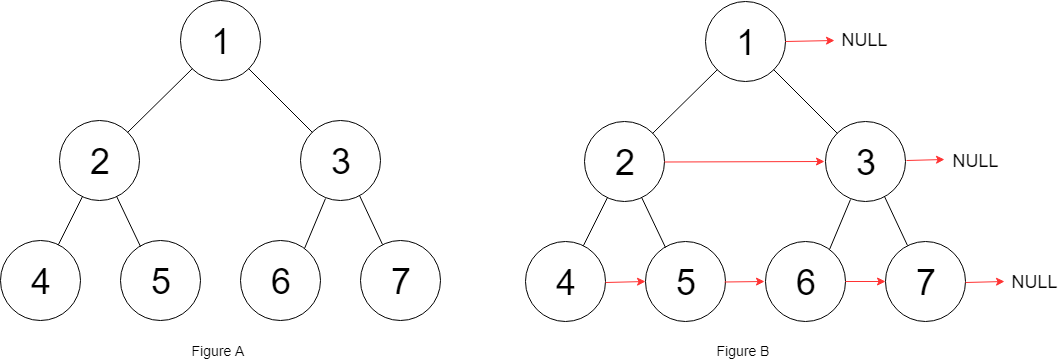

In [22]:

url = 'https://assets.leetcode.com/uploads/2019/02/14/116_sample.png'
Disp.Image(requests.get(url).content, width=600, height=200)

In [23]:

def connect(self, root):
    if not root:
        return
    
    q = [root]
    while q:
        lvl_len = len(q)
        for idx in range(lvl_len):

            node = q.pop(0)            
            if node.left:
                q.append(node.left)
            if node.right:
                q.append(node.right)
            
            if idx == (lvl_len-1): # last node in current level
                node.next = None
            else:
                node.next = q[0] # non-last node -> q[0] (Because you pop cur_node hence next will at position 0)
                print(node.val, "->", q[0].val)
                
    return root
    

In [1]:
float('inf') in [float('inf'),2,3]

True

#### Morris Traversal

#### Construct BT using Inorder + Preorder

https://www.geeksforgeeks.org/construct-tree-from-given-inorder-and-preorder-traversal/ <br><br>

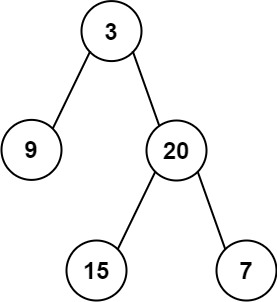

In [10]:
url = 'https://assets.leetcode.com/uploads/2021/02/19/tree.jpg'
Disp.Image(requests.get(url).content, width=200, height=200)

Postorder: [9,15,7,20,3] <br>
Preorder: [3,9,20,15,7]<br>
Inorder: [9,3,15,20,7]<br><br>

Preoder: Root -> Left -> Right<br>
Postorder: Left -> Right -> Root<br>

In [5]:

class Solution:
    def search_list(self, arr, val):
        # returns index of val
        for i,x in enumerate(arr):
            if val == x:
                return i
        return -1
    
    def build_subtree(self, in_start, in_end):
        if in_start > in_end:
            return None
        
        # find root from preorder
        cur_root = TreeNode(self.preorder[self.pre_start_index])
        self.pre_start_index += 1
        
        # check if only node left in inorder
        if in_start == in_end:
            return cur_root
                      
        # Get the index of cur_root in inorder -> to split the array
        cur_root_index = self.search_list(self.inorder, cur_root.val)
        # build sub-trees
        cur_root.left = self.build_subtree(in_start, cur_root_index-1)
        cur_root.right = self.build_subtree(cur_root_index+1, in_end)
                      
        return cur_root
        
    def buildTree(self, preorder, inorder):
        self.inorder = inorder
        self.preorder = preorder
        self.pre_start_index = 0 # GLOBAL
                      
        return self.build_subtree(0,len(inorder)-1)
        

#### Built BT from Inorder + Postorder

**Change from In + Pre**<br>
- In in+pre we first call method on `left_subtree` and then on `right_subtree`.<br>
- Initially we reverse postorder so that we dont have to reverse traverse.<br>
- Here we first we call on `right_subtree` and then on `left_subtree`<br><br>
**Why?**<br> Preorder traverses [Root -> Left -> Right] whereas<br> Postorder does [left -> Right -> Root => REVERSED => Root -> Right -> Left] <br>
Since pre|post start_index is global and we increment it in each call, we need to follow this approach

In [14]:

class Solution:
    def search_list(self, arr, val):
        # returns index of val
        for i,x in enumerate(arr):
            if val == x:
                return i
        return -1
    
    def build_subtree(self, in_start, in_end):
        if in_start > in_end:
            return None
        
        # find root from preorder
        cur_root = TreeNode(self.postorder[self.post_start_index])
        self.post_start_index += 1
        
        # check if only node left in inorder
        if in_start == in_end:
            return cur_root
                      
        # Get the index of cur_root in inorder -> to split the array
        cur_root_index = self.search_list(self.inorder, cur_root.val)
        # build sub-trees
        cur_root.right = self.build_subtree(cur_root_index+1, in_end)
        cur_root.left = self.build_subtree(in_start, cur_root_index-1)
        
                      
        return cur_root
    
    def buildTree(self, inorder, postorder):
        self.inorder = inorder
        self.postorder = list(reversed(postorder))
        self.post_start_index = 0 # GLOBAL
                      
        return self.build_subtree(0,len(inorder)-1)
        

#### Right View of Binary Tree

In [34]:

    def rightSideView(self, root):
        if root is None:
            return []
        elif root.left is None and root.right is None:
            return [root.val]
        
        q = []
        q.append(root)
        right_view = []
        
        while q:
            cur_lvl_len = len(q)
            for i in range(cur_lvl_len):
                node = q.pop(0)
                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)
                    
                if i == cur_lvl_len-1:
                    right_view.append(node.val)
        
        return right_view
        
        

#### Check Valid BST

Valid BST: For each node all elements in left-subtree are < node.val AND elements in right subtree are > node.val

In [32]:
class Solution:
    
    def check_valid(self, root, min_bound, max_bound):
        if root is None:
            return True
        
        cur_val = root.val
        if root.val >= max_bound or root.val <= min_bound:
            return False
        
        return self.check_valid(root.left, min_bound, cur_val) and self.check_valid(root.right, cur_val, max_bound)
            
        
    def isValidBST(self, root) -> bool:
        return self.check_valid(root, float('-inf'), float('inf'))

#### Balanced Binary Tree

A BT is balanced if at all nodes,<br> abs(height of left subtree - height of right subtree) <= 1 (either same, or differ by 1)

In [30]:
# NAIVE APPROACH
class Solution:
    def check_height(self, root):
        if root is None:
            return 0
        return 1 + max(self.check_height(root.left),self.check_height(root.right))
    
    def isBalanced(self, root):
        if root is None:
            return True
        if abs(self.check_height(root.left)-self.check_height(root.right)) >= 2:
            return False
        
        return self.isBalanced(root.left) and self.isBalanced(root.right)
        

#### Diameter of a BT

**Diameter** -> Max length of the path between two nodes (This path may or may not pass throuhg the root node) <br>

At each node you have path,<br>
1. path = 1 + max_height(left_subtree) + max_height(right_subtree)<br>
2. len(path) = no_of_nodes - 1<br><br>
So, to calculate this max_path_len we use a global/class variable<br>
And our function returns the max_height at each node<br>
-> Consider our function works like find_height at each node, and in between we add a line to check if the path formed is the maximum length one<br><br>

**CORE IDEA**<br>
For each node, diameter_including_this_node =  1 + max_height(left_subtree) + max_height(right_subtree) - 1(Question correction)<br>


In [33]:

class Solution:
    cur_max = 0
    def find_diameter(self, node):
        if node is None:
            return 0
        
        left_diameter = self.find_diameter(node.left)
        right_diameter = self.find_diameter(node.right)
        
        # check what if you include current node as well (l->cur->r = len = 2)
        self.cur_max = max(self.cur_max, left_diameter+right_diameter)
        
        # returns the max height till this node
        return 1+ max(left_diameter, right_diameter)
    
    def diameterOfBinaryTree(self, root) -> int:
        self.find_diameter(root)
        return self.cur_max
        
        

#### Trim a BST

https://leetcode.com/problems/trim-a-binary-search-tree/ <br>
Given a BST and its max,min values remove nodes which are not supposed to be in that BST

In [4]:
def trimBST(root, low: int, high: int):
    if root is None:
        return None
    
    # prune
    if root.val<low: # if val<min -> left subtree will also be < min 
        return trimBST(root.right, low, high) 
    elif root.val>high: # if val<max -> right subtree will also be > max
        return trimBST(root.left, low, high)
    else:
        root.left = trimBST(root.left, low, high)
        root.right = trimBST(root.right,low, high)
        return root
    

#### Convert BST to Greater BST

https://leetcode.com/problems/convert-bst-to-greater-tree <br>
Given the root of a Binary Search Tree (BST), convert it to a Greater Tree such that every key of the original BST is changed to the original key plus the sum of all keys greater than the original key in BST. <br><br>

**Solution** : You first visit right_most node of tree, n then subsequently keep on adding to suffix sum and also update left node<br>
If node is right_node -> val = val + sum(right_nodes)<br>
if Node is left_node -> val = val + parent_node_val + sum(right_node)<br>

In [2]:

class Solution:
    suffix_sum = 0
    
    def fill_bst(self, node):
        if node: #not None
            self.fill_bst(node.right)
            node.val += self.suffix_sum
            self.suffix_sum = node.val
            self.fill_bst(node.left)
            
        
    def convertBST(self, root):
        self.fill_bst(root)
        return root
        

#### Kth Smallest Element in a BST

Inorder traversal of BST -> Elements in sorted order

In [1]:
class Solution:
    count = 0
    ans = 0

    # INORDER TRAVERSAL VISITS IN SORTED ORDER
    def inorder(self, node, k):
        if node is None:
            return 
        
        self.inorder(node.left, k)
        self.count += 1
        if self.count == k:
            self.ans = node.val
            return
        self.inorder(node.right, k)
        
    def kthSmallest(self, root, k):
        self.count = 0
        self.inorder(root, k)
        return self.ans
        

## Backtracking + Recursion

#### Print all Substrings

In [154]:
def substring(processed, unprocessed):
    if len(unprocessed) == 0:
        print(processed, end=" -> ")
        return 
    
    fChar = unprocessed[0]
    unprocessed = unprocessed[1:]
    substring(processed+fChar, unprocessed)
    substring(processed, unprocessed)

In [155]:
substring("","abc")

abc -> ab -> ac -> a -> bc -> b -> c ->  -> 

#### Permutations of String

- Use Processed|Unprocessed Approach here <br>
- Pick first element from UP and add it in all possible places in Processed <br>
- There are len(P)+1 ways to place it in Proccesed string <br>
(ab|cd) -> c -> (cab,acb,abc | d)

In [179]:
res = []

def permute(p, up):
    global res

    if len(up) == 0:
        res.append(p)
        return
    
    ch = up[0]
    up = up[1:]

    # ABC ch=X
    permute(ch+p, up) # XABC
    for i in range(len(p)):
        permute(p[:i+1] + ch + p[i+1:], up)
    permute(p+ch, up) # ABCX



In [180]:
permute("","abcd")

print(len(res))

120


#### Letter Combination of Phone Number

In [224]:
n_map = {
    "2": [ch for ch in "abc"],
    "3": [ch for ch in "def"],
    "4": [ch for ch in "ghi"],
    "5": [ch for ch in "jkl"],
    "6": [ch for ch in "mno"],
    "7": [ch for ch in "pqrs"],
    "8": [ch for ch in "tuv"],
    "9": [ch for ch in "wxyz"]
}

def phone_comb(p, up, n_map):
    if len(up) == 0:
        print(p)
        return
    
    cur_num = up[0]
    up = up[1:]

    for ch in n_map[cur_num]:
        phone_comb(p+ch, up, n_map)


In [225]:
# RETURN ALL COMBINATIONS AS LIST
def phone_comb_iter(p, up, n_map):
    if len(up) == 0:
        return [p] if p!="" else []
    
    cur_num = up[0]
    up = up[1:]

    res = []
    for ch in n_map[cur_num]:
        res.extend(phone_comb_iter(p+ch, up, n_map))

    return res

In [226]:
phone_comb_iter("","23",n_map)

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']

#### Subsets II

In [61]:
# res = set()

def subsets_2(p, up):
    if len(up) == 0:
        print(p)
        # res.add(p)
        return

    ch = up[0]
    up = up[1:]

    subsets_2(p,up)
    subsets_2([*p, ch],up)

In [62]:
arr = [1,2,3]

subsets_2([],[1,2,2])

[]
[2]
[2]
[2, 2]
[1]
[1, 2]
[1, 2]
[1, 2, 2]


#### N-Queens

- Queen can move Diagonally, Up or Down. <br>
- We keep on filling row by row, so for each placement we need to check fo attack from other queens only in top rows

In [1]:
class Solution:
    def is_valid(self, row, col, board):
        nr = len(board)
        nc = len(board[0])

        # Check top only previous rows
        for i in range(row):
            if board[i][col]:
                return False
            
        # Check right-top diagonals"
        i = row-1
        j = col+1
        while j<nc:
            # print(i,j)
            if board[i][j]:
                return False
            i = i-1
            j = j+1
        
        # Check left-top diagonals
        i = row-1
        j = col-1
        while j>=0:
            # print(i,j)
            if board[i][j]:
                return False
            i = i-1
            j = j-1
            
        return True

    
    def n_queen(self, row, board):
        nr = len(board)
        nc = len(board[0])

        if row == nr:
            print(*board,"\n\n", sep="\n")
            return
        
        # place in all cells of row and check
        for j in range(nc):
            if self.is_valid(row, j, board):
                board[row][j] = True # mark as vis
                self.n_queen(row+1,board)  # try to place in next row
                board[row][j] = False # unmark after exploring
        
        return
    
    def solve_n_queen(self, n):
        board = [[False for _ in range(n)] for _ in range(n)]
        self.n_queen(0, board)


In [2]:
Solution().solve_n_queen(1)

[True]





#### Sudoku Solver

**How to rStart and cStart of which inner square (i,j) Lies**<hr>
k = sqrt(N) [k=size of each sub-square] <br>
rStart = (i//k) * k <br>
cStart = (j//k) * k <br> <hr>

Check that row:  <br>
for rStart -> rStart+k: <br>
&nbsp;&nbsp; for cStart -> cStart+k: <br>

In [1]:
import math

class SudokuSolution:
    def __init__(self):
        # ideally empty cells have '0' and all nos are in string format
        pass

    def find_first_slot(self, board):
        for i in range(len(board)):
            for j in range(len(board)):
                if board[i][j] == '0':
                    return (i,j)
        return (None, None)
    
    def is_safe(self, row, col, num, board):
        n = len(board)

        for i in range(n): # CHECK ROW + COL
            if board[row][i] == num or board[i][col]==num:
                return False

        # check sub_square
        k = int(math.sqrt(n))
        sRow = (row//k)*k
        sCol = (col//k)*k

        for i in range(sRow, sRow+k):
            for j in range(sCol, sCol+k):
                if board[i][j] == num:
                    return False
                
        return True

    def print_solution(self, board):
        print(*board,"\n", sep="\n")


    def solve(self, board):
        n = len(board)
        sRow, sCol = self.find_first_slot(board)   # find first Non-Empty cell
        if not sRow and not sCol: # no slots -> Solved
            self.print_solution(board)
            return True

        for fill_num in range(1,n+1):
            fill_num  = str(fill_num)
            if self.is_safe(sRow, sCol, fill_num, board):

                board[sRow][sCol] = fill_num
                if self.solve(board):
                    return True
                board[sRow][sCol] = '0'
        return False


In [ ]:
def print_first_palindrome(n):
    while n==0:
        for i in range(10):
            print(i)


def bfs(graph, src):
    vis = []
    vis.append(src)

    #mark all the unvisited nodes and then visit them one by one
    while vis:
        node = vis.pop()
        

In [ ]:
board = [
   ["5","3","0","0","7","0","0","0","0"],
   ["6","0","0","1","9","5","0","0","0"],
   ["0","9","8","0","0","0","0","6","0"],
   ["8","0","0","0","6","0","0","0","3"],
   ["4","0","0","8","0","3","0","0","1"],
   ["7","0","0","0","2","0","0","0","6"],
   ["0","6","0","0","0","0","2","8","0"],
   ["0","0","0","4","1","9","0","0","5"],
   ["0","0","0","0","8","0","0","7","9"]
]

SudokuSolution().solve(board)


['5', '3', '4', '6', '7', '8', '9', '1', '2']
['6', '7', '2', '1', '9', '5', '3', '4', '8']
['1', '9', '8', '3', '4', '2', '5', '6', '7']
['8', '5', '9', '7', '6', '1', '4', '2', '3']
['4', '2', '6', '8', '5', '3', '7', '9', '1']
['7', '1', '3', '9', '2', '4', '8', '5', '6']
['9', '6', '1', '5', '3', '7', '2', '8', '4']
['2', '8', '7', '4', '1', '9', '6', '3', '5']
['3', '4', '5', '2', '8', '6', '1', '7', '9']




True

## GKG Practice Questions

#### Return Largest & Second Largest Element in O(N)

In [46]:
def largestAndSecondLargest(arr):

        res = arr[0]
        second_res = -1
    
        for x in arr[1:]:
            if x > res:
                second_res = res
                res = x
            elif x<res:
                if second_res == -1:
                    second_res = x
                elif x > second_res:
                    second_res = x
                    
        return res,second_res

In [47]:
arr = [1,2,3,4,5]
print(largestAndSecondLargest(arr))

arr = [2,2,2,0,2,1]
print(largestAndSecondLargest(arr))

arr = [2,2,2,1,2,0]
print(largestAndSecondLargest(arr))

arr = [2,2,2,2,2,2]
print(largestAndSecondLargest(arr))


(5, 4)
(2, 1)
(2, 1)
(2, -1)


#### Trap Rainwater

In [48]:
def trappingWater(arr,n):
    left = [0 for _ in range(n)]
    right = [0 for _ in range(n)]
    
    left[0] = arr[0]
    for i in range(1,n):
        left[i] = max(left[i-1],arr[i])
        
    right[-1] = arr[-1]
    for i in reversed(range(0,n-1)):
        right[i] = max(right[i+1],arr[i])
        
    total_water = 0
    for i in range(n):
        total_water += min(left[i],right[i])-arr[i]
    
    return total_water

In [49]:
trappingWater([7,4,0,9],4)

10

#### Phone Keypad Dialing

In [50]:
class Solution:
    result = []
    key_chars = {
        2 : list("abc"), 
        3 : list("def"),
        4 : list("ghi"),
        5 : list("jkl"),
        6 : list("mno"),
        7 : list("pqrs"),
        8 : list("tuv"),
        9 : list("wxyz")
    }
    
    def get_possible_ways(self, up,p):
        # up -> list, p -> String initially empty
        if len(up) == 0:
            self.result.append(p)
            return
        
        cur_n = up[0]
        up = up[1:]
        
        for ch in self.key_chars[cur_n]:
            self.get_possible_ways(up,p+ch)
        
        
    #Function to find list of all words possible by pressing given numbers.
    def possibleWords(self,a,N):
        self.get_possible_ways(a,"")
        return self.result

In [51]:
arr = [2,2,4]
print(*Solution().possibleWords(arr, len(arr)),sep=" ")

aag aah aai abg abh abi acg ach aci bag bah bai bbg bbh bbi bcg bch bci cag cah cai cbg cbh cbi ccg cch cci


#### Print Powerset of String (lexographically ordered)

In [52]:
# Basically L-> Iteration | You either include cur_index or dont in result | Print once all indices are visited (Either picked or not doesnt matter)
def powerSet(S, cur_pick_index, cur_string):
    if cur_pick_index == len(S):
        print(cur_string)
        return 
    
    powerSet(S, cur_pick_index+1, cur_string+ S[cur_pick_index])
    powerSet(S, cur_pick_index+1, cur_string)



In [54]:
s = "xxyzz" # a ab abc ac b bc c
s = "abc"

powerSet(s, 0,"")

abc
ab
ac
a
bc
b
c



#### Maximize Index Distance

Given an array A[] of N positive integers. The task is to find the maximum of j - i subjected to the constraint of A[i] < A[j] and i < j.

**Solution**
1. Sort array based on val n store (idx,val); [(index,val),.......] <br>
2. Now automatically the first condition is fulfilled i.e all elements before `x` are less than `x` since we sorted it <br>
3. Now traverse this sorted array, n check which index pair gives max distance <br>
   At index `i` max_len = cur_index - smallest index before `i` or till `i` <br>

DRY RUN
1. arr = [34, 8, 10, 3, 2, 80, 30, 33, 1]
2. arr = [(0, 34), (1, 8), (2, 10), (3, 3), (4, 2), (5, 80), (6, 30), (7, 33), (8, 1)]
3. Sorting acc to values : [(8, 1), (4, 2), (3, 3), (1, 8), (2, 10), (6, 30), (7, 33), (0, 34), (5, 80)]
4. Indices : [8, 4, 3, 1, 2, 6, 7, 0, 5]

Now in indices find `i,j` such that `j-i` in maximized which is same as <br>
For each index `j` find an index before it and lowest -> `j`-`lowest_index_before_j` <br>
Here we for sure know that `arr[i]`<=`arr[j]` because array is sorted acc to values first

In [55]:
def maxIndexDiff(arr):
    arr = list(enumerate(arr)) # [index,val]
    print(arr)
    arr = sorted(arr, key=lambda x : x[1])
    print(arr)

    min_index = float('inf')
    max_diff = -1

    for index, val in arr:
        min_index = min(min_index,index)
        max_diff = max(max_diff, index-min_index)
    
    return max_diff


In [56]:
arr = [34, 8, 10, 3, 2, 80, 30, 33, 1]
maxIndexDiff(arr)

[(0, 34), (1, 8), (2, 10), (3, 3), (4, 2), (5, 80), (6, 30), (7, 33), (8, 1)]
[(8, 1), (4, 2), (3, 3), (1, 8), (2, 10), (6, 30), (7, 33), (0, 34), (5, 80)]


6

#### Kadanes Algorithm - I

1. For each index return `max subarray sum till index i` | DP array <br>
2. Max Subarray sum

In [20]:
def kadanes_I(arr):
    n = len(arr)
    dp = [arr[0]]
    cur_max = arr[0]
    max_till_now = arr[0]

    for x in arr[1:]:
        cur_max = max(cur_max+x, x)
        max_till_now = max(max_till_now, cur_max)
        dp.append(cur_max)

    print(*dp,sep=" ")
    return max_till_now

In [21]:
arr = [5,-2,-3,32,-5,65] # 5 3 0 32 27 92 -> 92
print(kadanes_I(arr))

arr = [-9,-8,8,3,-4] # -9 -8 8 11 7 -> 11
print(kadanes_I(arr))

5 3 0 32 27 92
92
-9 -8 8 11 7
11


#### Kadanes on non-neighboring

**Solution** <br>
At each index, you can either include it or not
1. include -> then you cant include previous element and include this or only include this<br>
   `max(max_exclude[i-1]+arr[i], arr[i])`
2. exclude -> If you cant include, then return max_sum before this index<br>
   `max(max_exclude[i-1]+arr[i], arr[i])`
   
**Note**: Even and odd arrys wont work. Why? Becuase you can also choose 0 2 4 11 13 16 18 <br>

In [23]:
#Function to return the maximum sum without adding adjacent elements.
def kadanes_II(arr):
    n = len(arr)
    res = 0
    max_include = [0 for _ in range(n)]
    max_exclude = [0 for _ in range(n)]

    max_include[0] = arr[0]
    max_exclude[0] = float('-inf')

    for i in range(1,n):
        # if you include i, then obvioiusly you cant include i-1
        max_include[i] = max(max_exclude[i-1]+arr[i], arr[i])
        # if you dont include i, then results are max upto i-1
        max_exclude[i] =max(max_exclude[i-1]+arr[i], arr[i])
        res = max(max_include[i], max_exclude[i])

    return res


In [24]:
arr = [int(x) for x in "6 4 7 8 4 7 1 7 3 6".split()]
print(kadanes_II(arr))

34
